In [3]:
import pandas as pd

df_car_prices1 = pd.read_csv('09-06-2024.csv')
df_car_prices2 = pd.read_csv('09-06-2024_v2.csv')
df_car_prices3 = pd.read_csv('09-06-2024_v3.csv')
df_car_prices = pd.concat([df_car_prices1, df_car_prices2,df_car_prices2])


In [4]:
from openai import OpenAI
import api_keys_chat

api_key = api_keys_chat.api_key
client = OpenAI(api_key=api_key)

stream = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": "Say this is a test"}],
    stream=True,
)

In [5]:
for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="")

This is a test.

In [6]:
def generate_answer(text):
    client = OpenAI(api_key=api_key)
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "user", "content": text},
            ]
        )

        result = ''
        for choice in response.choices:
            result += choice.message.content

    except Exception as e:
        return f"Oops!! Some problems with openAI. Reason: {e}"

    return result

In [5]:
df_car_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 0 to 3959
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     18000 non-null  int64 
 1   car_name       18000 non-null  object
 2   car_info       17996 non-null  object
 3   car_year_hand  18000 non-null  object
 4   car_price      18000 non-null  object
 5   car_tag        6063 non-null   object
dtypes: int64(1), object(5)
memory usage: 984.4+ KB


In [7]:
df_car_prices = df_car_prices.drop_duplicates()

In [8]:
df_car_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14040 entries, 0 to 3959
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     14040 non-null  int64 
 1   car_name       14040 non-null  object
 2   car_info       14036 non-null  object
 3   car_year_hand  14040 non-null  object
 4   car_price      14040 non-null  object
 5   car_tag        5981 non-null   object
dtypes: int64(1), object(5)
memory usage: 767.8+ KB


In [178]:
df_car_prices.head()

,Unnamed: 0,car_name,car_info,car_year_hand,car_price,car_tag
0,0,Mercedes A-Class,A250 Exc Plus hybrid hatchback 1.3 (160 hp),2022 • 1st hand,"210,000 ₪","Hybrid,Test in force,first hand"
1,1,BMW 7 Series,740LE IPer Luxury Hybrid Auto 2.0 (258 HP),2019 • Hand 1,"284,700 ₪","Adaptive cruise control,Distance control,Hybrid"
2,2,Alfa Romeo Giulia,Milano Auto 2.0 (197 hp),2018 • 1st hand,"92,400 ₪","Distance control,Economical,Magnesium wheels"
3,3,Mercedes S-Class,S350D Long Vision OT Diesel 3.0 (258 HP),2017 • 2nd hand,"285,900 ₪","Distance control,Economical,Magnesium wheels"
4,4,BMW 3 Series,318I Business Auto 2.0 (156 HP),2024 • 1st hand,"299,000 ₪","Distance control,Magnesium wheels,Test in force"


In [9]:
# Splitting the 'car_year_hand' column into 'year' and 'hand_num'
df_car_prices[['year', 'hand_num']] = df_car_prices['car_year_hand'].str.split('•', expand=True, n=1)
df_car_prices['year'] = df_car_prices['year'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_car_prices['hand_num'] = df_car_prices['hand_num'].apply(lambda x: ''.join(filter(str.isdigit, x)) if isinstance(x, str) else x)
df_car_prices


,Unnamed: 0,car_name,car_info,car_year_hand,car_price,car_tag,year,hand_num
0,0,Mercedes A-Class,A250 Exc Plus hybrid hatchback 1.3 (160 hp),2022 • 1st hand,"210,000 ₪","Hybrid,Test in force,first hand",2022,1
1,1,BMW 7 Series,740LE IPer Luxury Hybrid Auto 2.0 (258 HP),2019 • Hand 1,"284,700 ₪","Adaptive cruise control,Distance control,Hybrid",2019,1
2,2,Alfa Romeo Giulia,Milano Auto 2.0 (197 hp),2018 • 1st hand,"92,400 ₪","Distance control,Economical,Magnesium wheels",2018,1
3,3,Mercedes S-Class,S350D Long Vision OT Diesel 3.0 (258 HP),2017 • 2nd hand,"285,900 ₪","Distance control,Economical,Magnesium wheels",2017,2
4,4,BMW 3 Series,318I Business Auto 2.0 (156 HP),2024 • 1st hand,"299,000 ₪","Distance control,Magnesium wheels,Test in force",2024,1
...,...,...,...,...,...,...,...,...
3955,3955,Hyundai Sonata Hybrid,Premium Hybrid OT 2.0 (154 hp),2017 • 2nd hand,"64,000 ₪",NaN,2017,2
3956,3956,Ford Edge / EDGE,Titanium Plus automatic 2.0 (248 hp),2022 • 1st hand,"164,900 ₪",NaN,2022,1
3957,3957,Kia Sportage,Turbo Top Auto 1.6 (177 HP),2021 • 1st hand,"100,900 ₪",NaN,2021,1
3958,3958,BMW X4,4X4 XDRIVE 20I M-Sport 2.0 (184 כ''ס),2022 • 1st hand,"309,800 ₪",NaN,2022,1


In [10]:
df_car_prices.loc[:, 'price'] = df_car_prices['car_price'].str.replace('[₪,NIS,\s]', '', regex=True).str.replace(',', '').astype(float, errors='ignore')


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\v_gol\AppData\Local\Temp\ipykernel_22000\1684417613.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_car_prices.loc[:, 'price'] = df_car_prices['car_price'].str.replace('[₪,NIS,\s]', '', regex=True).str.replace(',', '').astype(float, errors='ignore')


In [12]:
df_car_prices

,Unnamed: 0,car_name,car_info,car_year_hand,car_price,car_tag,year,hand_num,price
0,0,Mercedes A-Class,A250 Exc Plus hybrid hatchback 1.3 (160 hp),2022 • 1st hand,"210,000 ₪","Hybrid,Test in force,first hand",2022,1,210000.0
1,1,BMW 7 Series,740LE IPer Luxury Hybrid Auto 2.0 (258 HP),2019 • Hand 1,"284,700 ₪","Adaptive cruise control,Distance control,Hybrid",2019,1,284700.0
2,2,Alfa Romeo Giulia,Milano Auto 2.0 (197 hp),2018 • 1st hand,"92,400 ₪","Distance control,Economical,Magnesium wheels",2018,1,92400.0
3,3,Mercedes S-Class,S350D Long Vision OT Diesel 3.0 (258 HP),2017 • 2nd hand,"285,900 ₪","Distance control,Economical,Magnesium wheels",2017,2,285900.0
4,4,BMW 3 Series,318I Business Auto 2.0 (156 HP),2024 • 1st hand,"299,000 ₪","Distance control,Magnesium wheels,Test in force",2024,1,299000.0
...,...,...,...,...,...,...,...,...,...
3955,3955,Hyundai Sonata Hybrid,Premium Hybrid OT 2.0 (154 hp),2017 • 2nd hand,"64,000 ₪",NaN,2017,2,64000.0
3956,3956,Ford Edge / EDGE,Titanium Plus automatic 2.0 (248 hp),2022 • 1st hand,"164,900 ₪",NaN,2022,1,164900.0
3957,3957,Kia Sportage,Turbo Top Auto 1.6 (177 HP),2021 • 1st hand,"100,900 ₪",NaN,2021,1,100900.0
3958,3958,BMW X4,4X4 XDRIVE 20I M-Sport 2.0 (184 כ''ס),2022 • 1st hand,"309,800 ₪",NaN,2022,1,309800.0


In [11]:
df_car_prices = df_car_prices.drop(['car_price', 'car_year_hand'], axis=1)

In [141]:
df_car_prices['car_tag'] = df_car_prices['car_tag'].str.lower()

In [142]:
df_car_prices['car_info'] = df_car_prices['car_info'].str.lower()

In [94]:
df_car_prices.head()

,Unnamed: 0,car_name,car_info,car_tag,year,hand_num,price
0,0,Mercedes A-Class,a250 exc plus hybrid hatchback 1.3 (160 hp),"hybrid,test in force,first hand",2022,1,210000.0
1,1,BMW 7 Series,740le iper luxury hybrid auto 2.0 (258 hp),"adaptive cruise control,distance control,hybrid",2019,1,284700.0
2,2,Alfa Romeo Giulia,milano auto 2.0 (197 hp),"distance control,economical,magnesium wheels",2018,1,92400.0
3,3,Mercedes S-Class,s350d long vision ot diesel 3.0 (258 hp),"distance control,economical,magnesium wheels",2017,2,285900.0
4,4,BMW 3 Series,318i business auto 2.0 (156 hp),"distance control,magnesium wheels,test in force",2024,1,299000.0


In [143]:
df_car_prices['car_name'].str.lower().value_counts()

car_name
kia sportage              441
toyota corolla hybrid     387
skoda octavia             337
kia picanto               295
nissan qashqai            274
                         ... 
kia ev9                     1
chevrolet colorado zr2      1
volvo 944                   1
peugeot 208 gti             1
mazda damio                 1
Name: count, Length: 735, dtype: int64

In [131]:
df_car_prices[df_car_prices['price'] > df_car_prices['price'].quantile(0.99)]

,Unnamed: 0,car_name,car_info,car_tag,year,hand_num,price
126,126,Land Rover Range Rover Sport,4X4 Hse Dynamic Auto Diesel 3.0 (306 HP),"Distance control,Magnesium wheels,Test in force",2022,2,605300.0
239,239,Porsche Tycoon,4X4 Performance electric auto (530 hp),"Economical,Magnesium wheels,electric",2024,1,685000.0
286,286,Mercedes S-Class,S580 4MATIC Maybach automatic 4.0 (507 hp),"Magnesium wheels,Test in force,first hand",2022,1,1250000.0
337,337,Mercedes GLE Coupe,4X4 GLE53 AMG Coupe Edition auto 3.0 (435 hp),"Magnesium wheels,sun-call,first hand",2022,1,680000.0
471,471,BMW X5,4X4 XDRIVE 40I M-Sport automatic 5 mk 3.0 (335...,"unique,Too bad to miss,on occasion",2024,0,625000.0
...,...,...,...,...,...,...,...
3462,3462,BMW 7 Series,745LE M-Superior Hybrid Auto 3.0 (286 HP),NaN,2024,0,850000.0
3479,3479,Mercedes C-Class,4X4 AMG C43 Edition auto 2.0 (408 hp),NaN,2024,1,695000.0
3827,3827,Mercedes C-Class,4X4 AMG C43 Edition auto 2.0 (408 hp),NaN,2024,1,695000.0
3869,3869,Mercedes SL,SL43 AMG Edition auto 2.0 (380 hp),"Distance control,safe,Magnesium wheels",2024,1,1155000.0


In [12]:
mean_prices = df_car_prices.groupby('car_name')['price'].mean().reset_index()
mean_prices['car_name'] =mean_prices['car_name'].str.lower()
print(len(mean_prices['car_name'].unique()))

735


In [13]:
mean_prices

,car_name,price
0,abarth 500,51316.666667
1,abarth 595,85500.000000
2,alfa romeo 147,20000.000000
3,alfa romeo 159,80000.000000
4,alfa romeo gt,27000.000000
...,...,...
730,קיה ריו,1000.000000
731,רנו מגאן קופה / ספורט,56500.000000
732,רנו פלואנס,34000.000000
733,שברולט בלייזר (2019 ואילך),178000.000000


In [33]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='auto', target='en')

# Function to translate text using deep_translator
def deep_translate_text(text, target='en'):
    return translator.translate(text)

mean_prices['car_name_en_translated'] = mean_prices['car_name'].apply(lambda x: deep_translate_text(x))

In [42]:
mean_prices

,car_name,price,car_name_en_translated
0,abarth 500,51316.666667,abarth 500
1,abarth 595,85500.000000,abarth 595
2,alfa romeo 147,20000.000000,alfa romeo 147
3,alfa romeo 159,80000.000000,alfa romeo 159
4,alfa romeo gt,27000.000000,alfa romeo gt
...,...,...,...
730,קיה ריו,1000.000000,kia rio
731,רנו מגאן קופה / ספורט,56500.000000,renault megane coupe / sport
732,רנו פלואנס,34000.000000,renault fluence
733,שברולט בלייזר (2019 ואילך),178000.000000,chevrolet blazer (2019 and later)


In [39]:
mean_prices['car_name_en_translated']= mean_prices['car_name_en_translated'].str.lower()

In [40]:
print(len(mean_prices['car_name'].unique()))
print(len(mean_prices['car_name_en_translated'].unique()))

735
674


In [43]:
car_name_dict = {k.lower(): v.lower() for k, v in mean_prices.set_index('car_name')['car_name_en_translated'].to_dict().items()}
car_name_dict

{'abarth 500': 'abarth 500',
 'abarth 595': 'abarth 595',
 'alfa romeo 147': 'alfa romeo 147',
 'alfa romeo 159': 'alfa romeo 159',
 'alfa romeo gt': 'alfa romeo gt',
 'alfa romeo giulia': 'alpha romeo giulia',
 'alfa romeo giulietta': 'alpha romeo giulietta',
 'alfa romeo mito / mito': 'alfa romeo mito / mito',
 'alfa romeo stelvio': 'alpha romeo stelvio',
 'aston martin db11': 'aston martin db11',
 'aston martin rapide': 'aston martin rapide',
 'audi 80': 'audi 80',
 'audi a1': 'audi a1',
 'audi a3': 'audi a3',
 'audi a4': 'audi a4',
 'audi a5': 'audi a5',
 'audi a6': 'audi a6',
 'audi a7': 'audi a7',
 'audi a8': 'audi a8',
 'audi e-tron': 'audi e-tron',
 'audi e-tron gt': 'audi e-tron gt',
 'audi e-tron q4': 'audi e-tron q4',
 'audi e-tron q8': 'audi e-tron q8',
 'audi q2': 'audi q2',
 'audi q3': 'audi q3',
 'audi q5': 'audi q5',
 'audi q7': 'audi q7',
 'audi q8': 'audi q8',
 'audi r8': 'audi-r8',
 'audi rs3': 'audi rs3',
 'audi rs5': 'audi rs5',
 'audi rs6': 'audi rs6',
 'audi rsq3

In [145]:
df_car_prices['car_name'].unique()

array(['Mercedes A-Class', 'BMW 7 Series', 'Alfa Romeo Giulia',
       'Mercedes S-Class', 'BMW 3 Series', 'Toyota Sequoia',
       'Hyundai Santa Fe', 'Skoda Karoq', 'Hyundai i20',
       'Renault Clio Estate', 'Jeep Compass', 'Seat Leon', 'BMW Z4',
       'Alfa Romeo Mito / MITO', 'Audi Q2',
       'Land Rover Range Rover Sport', 'Jeep / Jeep Wrangler long',
       'Mercedes Sprinter commercial', 'Porsche Cayenne',
       'Citroen Berlingo 2nd generation (2008-2019)',
       'Geely - Geely Geometry C', 'Dodge Ram short', 'Nissan Micra',
       'Nissan Qashqai', 'Hyundai Ioniq', 'Suzuki Ignis', 'Hyundai i10',
       'Mazda 3', 'Kia Sportage', 'Peugeot 208', 'Mercedes GLC',
       'Hyundai Sonata Hybrid', 'Kia Picanto', 'Chevrolet Trax',
       'Nissan X-Trail', 'Skoda Octavia', 'Toyota Corolla Hybrid',
       'Citroen Berlingo 3rd generation (2018 onwards)', 'Lexus RX350',
       'SRS / SERES SERES 3', 'Chevrolet Savanna long', 'Tesla Model 3',
       'Chevrolet Spark', 'Volkswagen Ti

In [80]:
# Use Gemini OpenAI to detect mistakes in brands
import pathlib
import textwrap
import google.generativeai as genai
import api_keys 

your_openai_api_key = api_keys.api_key
genai.configure(api_key=your_openai_api_key)

model = genai.GenerativeModel('gemini-1.5-flash')

response = model.generate_content(f"Detect mistakes in the following list of car brands: {df_car_prices['car_name'].unique()}")

# Detect mistakes in the uncommon brands
mistakes_in_brands = response.text

# Print the detected mistakes
print("Detected mistakes in brands:", mistakes_in_brands)

c:\Users\v_gol\Desktop\Developers Institute\Car_price_prediction_bot\Israels-Car-price-predictor-Telegramm-Bot\final_proj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

In [ ]:
# Use Gemini OpenAI to detect mistakes in brands
import pathlib
import textwrap
import google.generativeai as genai
import api_keys 

your_openai_api_key = api_keys.api_key
genai.configure(api_key=your_openai_api_key)

model = genai.GenerativeModel('gemini-1.5-flash')

response = model.generate_content(f"Detect mistakes in the following list of car model-brands: {df_car_prices['car_name'].unique()}")

# Detect mistakes in the uncommon brands
mistakes_in_brands = response.text

# Print the detected mistakes
print("Detected mistakes in brands:", mistakes_in_brands)

Detected mistakes in brands: Let's break down the mistakes in the car model-brand list:

**Typos and Inaccuracies**

* **'Mercedes-Benz A-Class'**: Should be "Mercedes-Benz A-Class" (capital A)
* **'BMW 7 Series'**: Should be "BMW 7 Series"
* **'Alfa Romeo Mito / MITO'**:  Should be "Alfa Romeo Mito" (consistent capitalization)
* **'Hyundai'**: This is a brand, not a model. It should be removed.
* **'Citroen C4 Speedorer'**: Should be "Citroen C4" (no Speedorer)
* **'Hyundai Accent (2019 onwards)'**:  This is a range, not a single model.  It's best to list it as just "Hyundai Accent".
* **'Honda Honda City'**:  Should be just "Honda City". 
* **'Mitsubishi Lancer Classic'**:  Should be "Mitsubishi Lancer"
* **'Maxus E-uniq 6 E-uniq'**:  Should be "Maxus Euniq 6" 
* **'Mercedes-Benz 316'**: This is likely a model from the past. It's best to avoid older models if the focus is on current vehicles.
* **'Isuzu iPhone 2X4'**:  This is a mistake; there's no iPhone model from Isuzu. It's likel

In [ ]:
# Use Gemini OpenAI to detect mistakes in brands
import pathlib
import textwrap
import google.generativeai as genai
import api_keys 

your_openai_api_key = api_keys.api_key
genai.configure(api_key=your_openai_api_key)

model = genai.GenerativeModel('gemini-1.5-flash')

response = model.generate_content(f"Detect mistakes in the following list of car model-brands: {df_car_prices['car_name'].unique()}")

# Detect mistakes in the uncommon brands
mistakes_in_brands = response.text

# Print the detected mistakes
print("Detected mistakes in brands:", mistakes_in_brands)

Detected mistakes in brands: Let's break down the mistakes and inconsistencies in this list:

**1. Formatting Issues:**

* **Inconsistent Spaces:**  Many entries have inconsistent spacing (e.g., ' Santa Fe', ' i20', ' Micra').  This should be standardized.
* **Missing or Extra Spaces:**  Some entries are missing spaces before the brand name (e.g., 'Mercedes-Benz A-Class' should be 'Mercedes-Benz A-Class') or have extra spaces (e.g., 'Mercedes-Benz  Sprinter').
* **Capitalization:**  Some brand and model names are not consistently capitalized (e.g., 'Alfa Romeo Mito / MITO' should be 'Alfa Romeo Mito').

**2. Duplicate Entries:**

* **Multiple Versions:**  Some models are listed with different variants, which should be consolidated (e.g., 'Toyota Land Cruiser Prado' and 'Toyota Land Cruiser' could be grouped as 'Toyota Land Cruiser').
* **Exact Duplicates:**  'Citroen Jumpy' appears twice.

**3. Misspellings and Inconsistencies:**

* **Misspellings:** 'Skoda Aniac' is likely a misspelli

In [ ]:
df_car_prices

,Unnamed: 0,car_name,car_info,car_tag,year,hand_num,price
0,0,Mercedes A-Class,a250 exc plus hybrid hatchback 1.3 (160 hp),"hybrid,test in force,first hand",2022,1,210000.0
1,1,Bmw 7 Series,740le iper luxury hybrid auto 2.0 (258 hp),"adaptive cruise control,distance control,hybrid",2019,1,284700.0
2,2,NaN,milano auto 2.0 (197 hp),"distance control,economical,magnesium wheels",2018,1,92400.0
3,3,Mercedes S-Class,s350d long vision ot diesel 3.0 (258 hp),"distance control,economical,magnesium wheels",2017,2,285900.0
4,4,Bmw 3 Series,318i business auto 2.0 (156 hp),"distance control,magnesium wheels,test in force",2024,1,299000.0
...,...,...,...,...,...,...,...
3955,3955,Hyundai Sonata Hybrid,premium hybrid ot 2.0 (154 hp),NaN,2017,2,64000.0
3956,3956,Ford Edge / Edge,titanium plus automatic 2.0 (248 hp),NaN,2022,1,164900.0
3957,3957,NaN,turbo top auto 1.6 (177 hp),NaN,2021,1,100900.0
3958,3958,Bmw X4,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,2022,1,309800.0


In [ ]:
df_car_prices.columns

Index(['Unnamed: 0', 'car_name', 'car_info', 'car_tag', 'year', 'hand_num',
       'price'],
      dtype='object')

In [14]:
df_car_prices_cleaned = df_car_prices[['car_name', 'price', 'year', 'hand_num','car_info','car_tag']]
df_car_prices_cleaned

,car_name,price,year,hand_num,car_info,car_tag
0,Mercedes A-Class,210000.0,2022,1,A250 Exc Plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand"
1,BMW 7 Series,284700.0,2019,1,740LE IPer Luxury Hybrid Auto 2.0 (258 HP),"Adaptive cruise control,Distance control,Hybrid"
2,Alfa Romeo Giulia,92400.0,2018,1,Milano Auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels"
3,Mercedes S-Class,285900.0,2017,2,S350D Long Vision OT Diesel 3.0 (258 HP),"Distance control,Economical,Magnesium wheels"
4,BMW 3 Series,299000.0,2024,1,318I Business Auto 2.0 (156 HP),"Distance control,Magnesium wheels,Test in force"
...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,Premium Hybrid OT 2.0 (154 hp),NaN
3956,Ford Edge / EDGE,164900.0,2022,1,Titanium Plus automatic 2.0 (248 hp),NaN
3957,Kia Sportage,100900.0,2021,1,Turbo Top Auto 1.6 (177 HP),NaN
3958,BMW X4,309800.0,2022,1,4X4 XDRIVE 20I M-Sport 2.0 (184 כ''ס),NaN


In [15]:
def get_brand_model(car_name):
    response = generate_answer(f"Extract brand and model from: {car_name}. You should return only brand and model separated with ';' and nothing else. Do not write anything except the brand and model separated by ';'. If it is written in hebrew traslate it to english.")
    parts = response.split(';')
    if len(parts) == 2:
        brand, model = parts
    else:
        brand, model = 'Unknown', 'Unknown'
    return brand, model

def get_country(model):
    response = generate_answer(f"Extract country from: {model}. You should return only country name based on the model name. If it is written in hebrew traslate it to english. If you do not know the country for brand return 'Unknown'")
    if response:
        return response
    else:
        return 'Unknown'

In [16]:
df_car_unique = pd.DataFrame(df_car_prices_cleaned['car_name'].unique())
df_car_unique.columns = ['car_name']
df_car_unique

,car_name
0,Mercedes A-Class
1,BMW 7 Series
2,Alfa Romeo Giulia
3,Mercedes S-Class
4,BMW 3 Series
...,...
730,Porsche 718 Cayman
731,Volvo S80
732,Mercedes 316
733,Isuzu Trooper long


In [17]:
from openai import OpenAI
import api_keys_chat

api_key = api_keys_chat.api_key
client = OpenAI(api_key=api_key)

def generate_answer(text):
    client = OpenAI(api_key=api_key)
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "user", "content": text},
            ]
        )

        result = ''
        for choice in response.choices:
            result += choice.message.content

    except Exception as e:
        return f"Oops!! Some problems with openAI. Reason: {e}"

    return result

In [18]:
df_car_unique[['brand', 'model']] = df_car_unique['car_name'].apply(lambda x: pd.Series(get_brand_model(x)))

In [19]:
df_car_unique

,car_name,brand,model
0,Mercedes A-Class,Mercedes,A-Class
1,BMW 7 Series,BMW,7 Series
2,Alfa Romeo Giulia,Alfa Romeo,Giulia
3,Mercedes S-Class,Mercedes,S-Class
4,BMW 3 Series,BMW,3 Series
...,...,...,...
730,Porsche 718 Cayman,Porsche,718 Cayman
731,Volvo S80,Volvo,S80
732,Mercedes 316,Mercedes,316
733,Isuzu Trooper long,Isuzu,Trooper


In [ ]:
df_car_unique.to_dict()

{'car_name': {0: 'Mercedes A-Class',
  1: 'BMW 7 Series',
  2: 'Alfa Romeo Giulia',
  3: 'Mercedes S-Class',
  4: 'BMW 3 Series',
  5: 'Toyota Sequoia',
  6: 'Hyundai Santa Fe',
  7: 'Skoda Karoq',
  8: 'Hyundai i20',
  9: 'Renault Clio Estate',
  10: 'Jeep Compass',
  11: 'Seat Leon',
  12: 'BMW Z4',
  13: 'Alfa Romeo Mito / MITO',
  14: 'Audi Q2',
  15: 'Land Rover Range Rover Sport',
  16: 'Jeep / Jeep Wrangler long',
  17: 'Mercedes Sprinter commercial',
  18: 'Porsche Cayenne',
  19: 'Citroen Berlingo 2nd generation (2008-2019)',
  20: 'Geely - Geely Geometry C',
  21: 'Dodge Ram short',
  22: 'Nissan Micra',
  23: 'Nissan Qashqai',
  24: 'Hyundai Ioniq',
  25: 'Suzuki Ignis',
  26: 'Hyundai i10',
  27: 'Mazda 3',
  28: 'Kia Sportage',
  29: 'Peugeot 208',
  30: 'Mercedes GLC',
  31: 'Hyundai Sonata Hybrid',
  32: 'Kia Picanto',
  33: 'Chevrolet Trax',
  34: 'Nissan X-Trail',
  35: 'Skoda Octavia',
  36: 'Toyota Corolla Hybrid',
  37: 'Citroen Berlingo 3rd generation (2018 onwards

In [ ]:
df_car_unique

unknown_brands_models = df_car_unique[(df_car_unique['brand'] == 'Unknown') | (df_car_unique['model'] == 'Unknown')]
unknown_brands_models

df_car_unique = df_car_unique[(df_car_unique['brand'] != 'Unknown') & (df_car_unique['model'] != 'Unknown')]


In [ ]:
unknown_brands_models

,car_name,brand,model
17,Mercedes Sprinter commercial,Mercedes,Sprinter
50,Mitsubishi Eclipse Cross,Mitsubishi,Eclipse Cross
63,Renault Megane Estate/ Grand Tour,Renault,Megane
71,Suzuki Vitra,Suzuki,Vitra
86,Kia Soul,Kia,Soul
89,Mitsubishi Atrage,Mitsubishi,Atrage
120,Suzuki Splash,Suzuki,Splash
144,Chevrolet Vivant,Chevrolet,Vivant
169,Citroen C4 Speedorer,Citroen,C4
178,BMW X1,BMW,X1


In [ ]:
df_car_unique = pd.concat([df_car_unique, unknown_brands_models])
df_car_unique

,car_name,brand,model
0,Mercedes A-Class,Mercedes,A-Class
1,BMW 7 Series,BMW,7 Series
2,Alfa Romeo Giulia,Alfa Romeo,Giulia
3,Mercedes S-Class,Mercedes,S-Class
4,BMW 3 Series,BMW,3 Series
...,...,...,...
619,Citroen C Eliza,Citroen,C Eliza
633,Toyota Hiace short,Toyota,Hiace
641,Citroen Berlingo electric,Citroen,Berlingo electric
686,מרצדס CLA,Mercedes,CLA


In [20]:
def add_brand_model(df_car_prices_cleaned, df_car_unique):
    df_car_prices_cleaned['brand'] = df_car_prices_cleaned['car_name'].apply(lambda x: df_car_unique.loc[df_car_unique['car_name'] == x, 'brand'].values[0] if len(df_car_unique.loc[df_car_unique['car_name'] == x, 'brand'].values) > 0 else 'Unknown')
    df_car_prices_cleaned['model'] = df_car_prices_cleaned['car_name'].apply(lambda x: df_car_unique.loc[df_car_unique['car_name'] == x, 'model'].values[0] if len(df_car_unique.loc[df_car_unique['car_name'] == x, 'model'].values) > 0 else 'Unknown')
    return df_car_prices_cleaned

df_car_prices_cleaned = add_brand_model(df_car_prices_cleaned, df_car_unique)


In [21]:
df_car_prices_cleaned

,car_name,price,year,hand_num,car_info,car_tag,brand,model
0,Mercedes A-Class,210000.0,2022,1,A250 Exc Plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand",Mercedes,A-Class
1,BMW 7 Series,284700.0,2019,1,740LE IPer Luxury Hybrid Auto 2.0 (258 HP),"Adaptive cruise control,Distance control,Hybrid",BMW,7 Series
2,Alfa Romeo Giulia,92400.0,2018,1,Milano Auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels",Alfa Romeo,Giulia
3,Mercedes S-Class,285900.0,2017,2,S350D Long Vision OT Diesel 3.0 (258 HP),"Distance control,Economical,Magnesium wheels",Mercedes,S-Class
4,BMW 3 Series,299000.0,2024,1,318I Business Auto 2.0 (156 HP),"Distance control,Magnesium wheels,Test in force",BMW,3 Series
...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,Premium Hybrid OT 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid
3956,Ford Edge / EDGE,164900.0,2022,1,Titanium Plus automatic 2.0 (248 hp),NaN,Ford,Edge
3957,Kia Sportage,100900.0,2021,1,Turbo Top Auto 1.6 (177 HP),NaN,Kia,Sportage
3958,BMW X4,309800.0,2022,1,4X4 XDRIVE 20I M-Sport 2.0 (184 כ''ס),NaN,BMW,X4


In [ ]:
df_car_prices_cleaned

,car_name,price,year,hand_num,car_info,car_tag,brand,model
0,Mercedes A-Class,210000.0,2022,1,A250 Exc Plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand",Mercedes,A-Class
1,BMW 7 Series,284700.0,2019,1,740LE IPer Luxury Hybrid Auto 2.0 (258 HP),"Adaptive cruise control,Distance control,Hybrid",BMW,7 Series
2,Alfa Romeo Giulia,92400.0,2018,1,Milano Auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels",Alfa Romeo,Giulia
3,Mercedes S-Class,285900.0,2017,2,S350D Long Vision OT Diesel 3.0 (258 HP),"Distance control,Economical,Magnesium wheels",Mercedes,S-Class
4,BMW 3 Series,299000.0,2024,1,318I Business Auto 2.0 (156 HP),"Distance control,Magnesium wheels,Test in force",BMW,3 Series
...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,Premium Hybrid OT 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid
3956,Ford Edge / EDGE,164900.0,2022,1,Titanium Plus automatic 2.0 (248 hp),NaN,Ford,Edge
3957,Kia Sportage,100900.0,2021,1,Turbo Top Auto 1.6 (177 HP),NaN,Kia,Sportage
3958,BMW X4,309800.0,2022,1,4X4 XDRIVE 20I M-Sport 2.0 (184 כ''ס),NaN,BMW,X4


In [ ]:
df_car_prices_cleaned['car_info'].unique()

array(['A250 Exc Plus hybrid hatchback 1.3 (160 hp)',
       '740LE IPer Luxury Hybrid Auto 2.0 (258 HP)',
       'Milano Auto 2.0 (197 hp)', ...,
       '4X4 Style Auto Diesel 2.0 (150 HP)',
       'Executive sedan 1.8 (180 hp)',
       'EQS580 4M Platinum Plus EV electric auto (523 hp) K1'],
      dtype=object)

In [22]:
import re

# Extracting horse power from 'car_info_en' column
df_car_prices_cleaned.loc[:, 'horse_power'] = df_car_prices_cleaned['car_info'].str.extract(r'\((\d+)\s*hp\)', flags=re.IGNORECASE)[0].astype(float)

# Make 'car_info_en' column lowercase
df_car_prices_cleaned.loc[:, 'car_info'] = df_car_prices_cleaned['car_info'].str.lower()

# Create 'hybrid' column based on the presence of the word 'hybrid' in 'car_info_en' or 'car_tags_en'
df_car_prices_cleaned.loc[:, 'hybrid'] = df_car_prices_cleaned[['car_info', 'car_tag']].apply(lambda x: 'hybrid' in ' '.join(x.astype(str)).lower(), axis=1)

# Add '4x4' column based on the presence of the term '4x4' in 'car_info_en'
df_car_prices_cleaned.loc[:, '4x4'] = df_car_prices_cleaned['car_info'].str.contains('4x4', na=False)

# Create 'fuel_type' column based on the presence of specific fuel types in 'car_info_en' or 'car_tags_en'
def determine_fuel_type(row):
    info = ' '.join(row).lower()
    if 'diesel' in info and 'electric' in info:
        return 'hybrid'
    elif 'diesel' in info:
        return 'diesel'
    elif 'petrol' in info and 'electric' in info:
        return 'hybrid'
    elif 'petrol' in info or 'gasoline' in info:
        return 'petrol'
    elif 'electric' in info:
        return 'electric'
    elif 'hybrid' in info:
        return 'hybrid'
    else:
        return 'unknown'

df_car_prices_cleaned.loc[:, 'fuel_type'] = df_car_prices_cleaned[['car_tag','car_info']].astype(str).apply(determine_fuel_type, axis=1)

df_car_prices_cleaned

,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"Adaptive cruise control,Distance control,Hybrid",BMW,7 Series,258.0,True,False,hybrid
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,unknown
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"Distance control,Economical,Magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"Distance control,Magnesium wheels,Test in force",BMW,3 Series,156.0,False,False,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid
3956,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,unknown
3957,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,unknown
3958,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,unknown


In [23]:
df_car_prices_cleaned
# Extracting engine volume from 'car_info_en' column
df_car_prices_cleaned['engine_volume'] = df_car_prices_cleaned['car_info'].str.extract(r'(\d\.\d)', flags=re.IGNORECASE)[0].astype(float)

# Display the updated DataFrame
df_car_prices_cleaned


,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid,1.3
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"Adaptive cruise control,Distance control,Hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,unknown,2.0
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"Distance control,Economical,Magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"Distance control,Magnesium wheels,Test in force",BMW,3 Series,156.0,False,False,unknown,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0
3956,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,unknown,2.0
3957,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,unknown,1.6
3958,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,unknown,2.0


In [24]:
# Update 'fuel_type' to 'electric' if 'car_name_en' contains 'EQC', 'EV', 'Ioniq', or 'BYD'
df_car_prices_cleaned.loc[
    df_car_prices_cleaned['car_name'].str.contains('EQC|EV|Ioniq|BYD', case=False, na=False) & 
    (df_car_prices_cleaned['fuel_type'] == 'unknown'), 
    'fuel_type'
] = 'electric'

In [25]:
not_def_vol = df_car_prices_cleaned[df_car_prices_cleaned['engine_volume'].isna()]
not_def_vol = not_def_vol[not_def_vol['fuel_type'] == 'unknown']
not_def_vol


,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume
13,BMW Z4,390000.0,2022,2,z4 m40i m-superior,"Adaptive cruise control,Distance control,Magne...",BMW,Z4,NaN,False,False,unknown,NaN
576,If. G. / MG MG4,138000.0,2023,1,luxury automatic (204 hp),"Adaptive cruise control,Economical,Magnesium w...",MG,MG4,204.0,False,False,unknown,NaN
940,Dacia Spring,82000.0,2023,0,comfort plus,"Distance control,Magnesium wheels,Extra access...",Dacia,Spring,NaN,False,False,unknown,NaN
1118,Dacia Spring,82000.0,2023,0,comfort plus,"Distance control,Magnesium wheels,Extra access...",Dacia,Spring,NaN,False,False,unknown,NaN
1752,Fiat Scudo,245990.0,2024,1,shield - vfehz7b2f21c,"Distance control,first hand,Financing options",Fiat,Scudo,NaN,False,False,unknown,NaN
1790,אורה / Ora Funky Cat,129900.0,2024,1,"420 pro אוט' חשמלי (171 כ""ס)","בקרת שיוט אדפטיבית,בטיחותי,חשמלי",Ora,Funky Cat,NaN,False,False,unknown,NaN
1847,Subaru BRZ,202000.0,2023,2,fast - zd8ble8,"Distance control,Magnesium wheels,Test in force",Subaru,BRZ,NaN,False,False,unknown,NaN
2466,Skywall ET5,252800.0,2024,1,et5 xr86luxury,"Test in force,first hand,Financing options",Skywall,ET5,NaN,False,False,unknown,NaN
2526,Audi A4,36500.0,2013,2,NaN,"Test in force,extremely guarded",Audi,A4,NaN,False,False,unknown,NaN
3242,Skoda Kodiaq,115000.0,2018,2,style auto 4x4 volume 1984 (190 hp),NaN,Skoda,Kodiaq,190.0,False,True,unknown,NaN


In [26]:
df_car_prices_cleaned = df_car_prices_cleaned.drop(not_def_vol.index)

In [ ]:
df_car_prices_cleaned

,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid,1.3
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"Adaptive cruise control,Distance control,Hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,unknown,2.0
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"Distance control,Economical,Magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"Distance control,Magnesium wheels,Test in force",BMW,3 Series,156.0,False,False,unknown,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0
3956,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,unknown,2.0
3957,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,unknown,1.6
3958,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,unknown,2.0


In [ ]:
df_car_prices_cleaned[(df_car_prices_cleaned['fuel_type'] == 'petrol') | (df_car_prices_cleaned['fuel_type'] == 'gasoline')]


,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume
6,Hyundai Santa Fe,92500.0,2017,1,4x4 premium ute gasoline 5 mk 2.4 (192 hp),"Distance control,Magnesium wheels,Test in force",Hyundai,Santa Fe,192.0,False,True,petrol,2.4
51,Land Rover Range Rover Sport,380000.0,2020,1,4x4 hse dyn hybrid ut petrol 2.0 (300 hp) k'-1,"Hybrid,Test in force,first hand",Land Rover,Range Rover Sport,300.0,True,True,petrol,2.0
63,Hyundai Tucson,105000.0,2020,1,elite turbo gasoline engine 1.6 (177 hp),"Adaptive cruise control,Distance control,Magne...",Hyundai,Tucson,177.0,False,False,petrol,1.6
107,Hyundai Tucson,103000.0,2021,1,premium petrol 2.0 (156 hp),"Distance control,Magnesium wheels,Test in force",Hyundai,Tucson,156.0,False,False,petrol,2.0
118,Hyundai Santa Fe,59900.0,2013,2,4x4 supreme ute gasoline 7 mk 2.4 (192 hp),"Magnesium wheels,sun-call,Test in force",Hyundai,Santa Fe,192.0,False,True,petrol,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,Hyundai Tucson,110000.0,2020,3,panoramic ot gasoline 2.0 (155 hp),NaN,Hyundai,Tucson,155.0,False,False,petrol,2.0
3859,Renault Kedgar,45000.0,2016,2,zen petrol 1.2 (130 hp),NaN,Renault,Kedgar,130.0,False,False,petrol,1.2
3880,Hyundai Tucson,110000.0,2020,3,panoramic ot gasoline 2.0 (155 hp),NaN,Hyundai,Tucson,155.0,False,False,petrol,2.0
3883,Renault Kedgar,45000.0,2016,2,zen petrol 1.2 (130 hp),NaN,Renault,Kedgar,130.0,False,False,petrol,1.2


In [27]:
df_car_prices_cleaned.loc[df_car_prices_cleaned['fuel_type'] == 'gasoline', 'fuel_type'] = 'petrol'
df_car_prices_cleaned


,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid,1.3
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"Adaptive cruise control,Distance control,Hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,unknown,2.0
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"Distance control,Economical,Magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"Distance control,Magnesium wheels,Test in force",BMW,3 Series,156.0,False,False,unknown,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0
3956,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,unknown,2.0
3957,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,unknown,1.6
3958,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,unknown,2.0


In [ ]:
df_car_prices_cleaned['fuel_type'].unique()

array(['unknown', 'hybrid', 'diesel', 'electric', 'petrol'], dtype=object)

In [ ]:
df_car_prices_cleaned

,car_name_en,price,year,hand_num,car_info_en,car_tags_en,horse_power,hybrid,4x4,fuel_type,engine_volume
0,Jeep / Jeep Wrangler long,300000.0,2021,1,4x4 unlimited sahara ot' 5 del' 2.0 (272 hp),"Magnesium wheels, fully tested, first hand",272.0,False,True,unknown,2.0
1,Audi Q7,216000.0,2018,2,4x4 premium electric diesel auto 5 mk 3.0 (374...,"Economical, hybrid, valid test",374.0,True,True,hybrid,3.0
2,Subaru Forester,42000.0,2011,3,4x4 b auto 2.0 (150 hp) [2008-2011],"Hard terrain, valid test, multimedia system",150.0,False,True,unknown,2.0
3,Jeep / Jeep Grand Cherokee,160000.0,2019,1,4x4 laredo auto 5 mk 3.6 (286 hp),"Distance control, magnesium wheels, valid test",286.0,False,True,unknown,3.6
4,Toyota Land Cruiser long,123000.0,2008,1,4x4 std ot diesel 5 mk 3.0 (173 hp),"Large fuel tank, fully tested, first hand",173.0,False,True,diesel,3.0
...,...,...,...,...,...,...,...,...,...,...,...
13485,Skoda Octavia,66000.0,2018,1,ambition auto 1.0 (115 hp),"Distance control, economical",115.0,False,False,unknown,1.0
13486,Toyota Aygo (AYGO),19900.0,2013,4,plus robotic 1.0 (69 hp),"Economical, valid test",69.0,False,False,unknown,1.0
13487,Renault Megane Grand Coupe,49900.0,2018,4,intense ot diesel 1.5 (110 hp),"Economical, magnesium wheels",110.0,False,False,diesel,1.5
13489,Nissan Juke / Juke,37990.0,2016,3,acenta auto 1.6 (117 hp),"Magnesium wheels, fully tested",117.0,False,False,unknown,1.6


In [28]:
df_car_prices_cleaned.loc[df_car_prices_cleaned['fuel_type'] == 'unknown', 'fuel_type'] = 'petrol'

In [ ]:
df_car_prices_cleaned

,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid,1.3
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"Adaptive cruise control,Distance control,Hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,petrol,2.0
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"Distance control,Economical,Magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"Distance control,Magnesium wheels,Test in force",BMW,3 Series,156.0,False,False,petrol,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0
3956,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,petrol,2.0
3957,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,petrol,1.6
3958,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,petrol,2.0


In [ ]:
df_car_prices_cleaned['brand'].unique()

array(['Mercedes', 'BMW', 'Alfa Romeo', 'Toyota', 'Hyundai', 'Skoda',
       'Renault', 'Jeep', 'Seat', 'Audi', 'Land Rover', 'Porsche',
       'Citroen', 'Geely', 'Dodge', 'Nissan', 'Suzuki', 'Mazda', 'Kia',
       'Peugeot', 'Chevrolet', 'Lexus', 'SERES', 'Tesla', 'Volkswagen',
       'Subaru', 'Mitsubishi', 'Opel', 'G. / MG', 'Cadillac', 'Honda',
       'Ford', 'Jaguar', 'Dacia', 'Genesis', 'Fiat', 'Ssangyong', 'DS',
       'Copra', 'Ora', 'MG', 'Infiniti QX50', 'Opal', 'Volvo', 'BYD',
       'GMC', 'Chrysler', 'Infiniti', 'Abarth', 'Maserati', 'Smart',
       'Eways', 'leapmotor', 'Maxx', 'Ivoco', 'Lincoln', 'Cupra', 'Mini',
       'Isuzu', 'Citroën', 'Lamborghini', 'Buick', 'SsangYong', 'McLaren',
       'Daihatsu', 'Astra', 'ZEEKR', 'Chery', 'Aston Martin', 'Polestar',
       'Lancia', 'MINI', 'Lynk&Co', 'Mann', 'Skywall', 'Chevy', 'XPENG',
       'Maxus', 'Unknown', 'Seres', 'Great Wall', 'EVEASY', 'GAC',
       'Ferrari', 'Neo / NIO', 'Bentley', 'G', 'VOYAH'], dtype=object)

In [ ]:
# df_manufactories = pd.read_csv('manufacturers.csv', names=['brand', 'country', 'year'])


In [ ]:
# df_manufactories

In [ ]:
# # Convert both brand columns to lowercase for comparison
# df_car_prices_cleaned['brand_lower'] = df_car_prices_cleaned['brand'].str.lower()
# df_manufactories['brand_lower'] = df_manufactories['brand'].str.lower()

# # Find the brands in df_car_prices_cleaned that are not in df_manufactories
# uncommon_brands = df_car_prices_cleaned[~df_car_prices_cleaned['brand_lower'].isin(df_manufactories['brand_lower'])]

# # Display the uncommon brands
# uncommon_brands

# # Clean up the temporary columns
# df_car_prices_cleaned.drop(columns=['brand_lower'], inplace=True)
# df_manufactories.drop(columns=['brand_lower'], inplace=True)


In [ ]:
# Use Gemini OpenAI to detect mistakes in brands
import pathlib
import textwrap
import google.generativeai as genai
import api_keys 

your_openai_api_key = api_keys.api_key
genai.configure(api_key=your_openai_api_key)

model = genai.GenerativeModel('gemini-1.5-flash')

brands = df_car_prices_cleaned['brand'].unique().tolist()

response = model.generate_content(f"Detect mistakes in the following list of car brands: {brands}")

# Detect mistakes in the uncommon brands
mistakes_in_brands = response.text

# Print the detected mistakes
print("Detected mistakes in brands:", mistakes_in_brands)


c:\Users\v_gol\Desktop\Developers Institute\Car_price_prediction_bot\Israels-Car-price-predictor-Telegramm-Bot\final_proj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Detected mistakes in brands: The list contains a few potential mistakes:

* **"Mercedes"** should be **"Mercedes-Benz"**. While commonly shortened to "Mercedes," the full name is Mercedes-Benz.
* **"DS"** is a sub-brand of **Citroen**. While it operates independently, it's technically not a separate brand.
* **"Aston"** is incomplete. The full name is **"Aston Martin"**.
* **"EV Easy"** is not a car brand, but a company that offers electric car charging services. 

The rest of the list seems to be accurate. 



In [ ]:
# Correcting the detected mistakes in the list of car brands
# Define a dictionary for brand corrections
brand_corrections = {
    'Skywall': 'Skywell',
    'mini': 'Mini',
    'seat': 'Seat',
    'leapmotor': 'Leap Motor',
    'EVEASY': 'EV Easy',
    'Opal': 'Opel',
    'Copra': 'Cupra'
}

# List of non-car brands to remove
non_car_brands = ['The', 'If.', 'balm', 'is', 'SRS', 'Mann', 'Long']

# Apply corrections and remove mistakes
df_car_prices_cleaned['brand'] = df_car_prices_cleaned['brand'].apply(
    lambda x: brand_corrections.get(x, x) if x not in non_car_brands else None
)

# Drop rows with None values in 'brand' column
df_car_prices_cleaned.dropna(subset=['brand'], inplace=True)



In [ ]:
# Correcting additional detected mistakes in the list of car brands
additional_brand_corrections = {
    'Mercedes': 'Mercedes-Benz',
    'DS': 'Citroen',
    'Aston': 'Aston Martin'
}

# List of additional non-car brands to remove
additional_non_car_brands = ['EV Easy']

# Apply additional corrections and remove additional mistakes
df_car_prices_cleaned['brand'] = df_car_prices_cleaned['brand'].apply(
    lambda x: additional_brand_corrections.get(x, x) if x not in additional_non_car_brands else None
)

# Drop rows with None values in 'brand' column after additional corrections
df_car_prices_cleaned.dropna(subset=['brand'], inplace=True)


In [ ]:
df_car_prices_cleaned['brand'].unique()

array(['Jeep', 'Audi', 'Subaru', 'Toyota', 'Skoda', 'Nissan',
       'Mercedes-Benz', 'Hyundai', 'Ssangyong', 'BMW', 'Chevrolet', 'Kia',
       'Mazda', 'Mitsubishi', 'Volvo', 'Peugeot', 'Alfa', 'Volkswagen',
       'Dacia', 'Ora', 'Citroen', 'Cupra', 'Opel', 'Tesla', 'Renault',
       'Fiat', 'Jaguar', 'Land', 'Seat', 'Honda', 'Chrysler', 'Skywell',
       'Mini', 'Isuzu', 'Suzuki', 'Ford', 'Infiniti', 'Genesis', 'Geely',
       'Porsche', 'Eways', 'Maserati', 'Dodge', 'Cadillac', 'Lexus',
       'Smart', 'Daihatsu', 'Lincoln', 'BYD', 'Abarth', 'GAC', 'GMC',
       'Maxus', 'Hummer', 'Leap Motor', 'Hongqi', 'XPENG', 'MINI',
       'Chery', 'JAC', 'Lynk&Co', 'Buick', 'Ferrari', 'Chevy', 'Polestar',
       'VOYAH', 'Lancia', 'ZEEKR', 'Aston Martin', 'Lamborghini',
       'Pontiac', 'Wey'], dtype=object)

C:\Users\v_gol\AppData\Local\Temp\ipykernel_22000\1080909022.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_price_per_brand.head(10).values, y=mean_price_per_brand.head(10).index, palette='viridis')


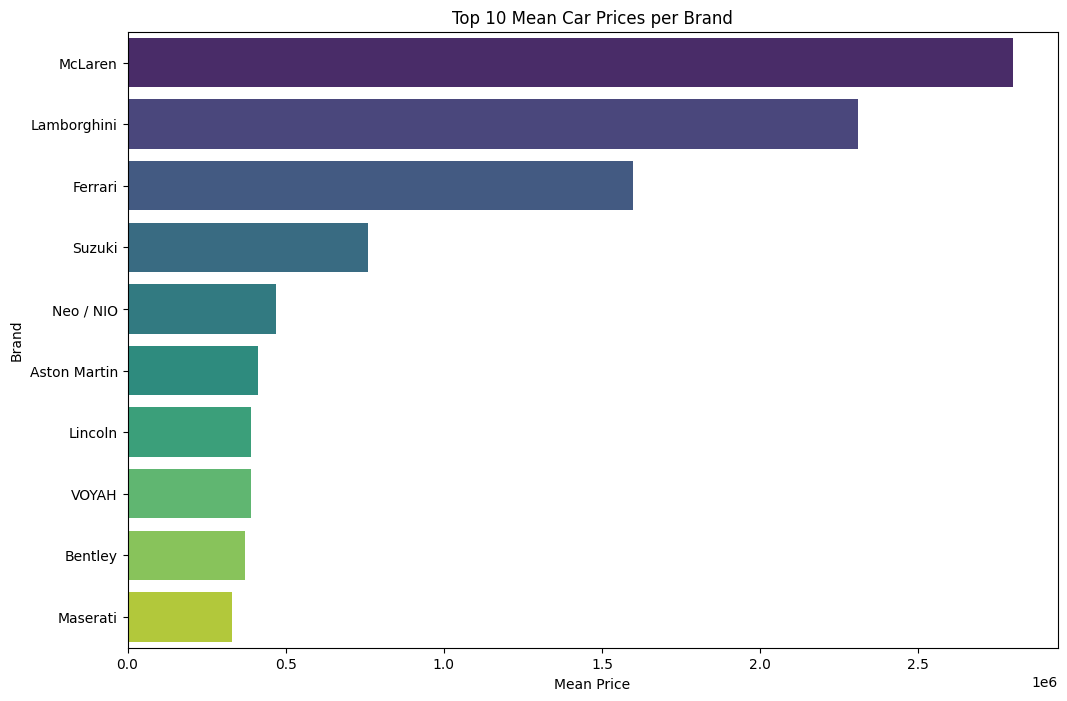

C:\Users\v_gol\AppData\Local\Temp\ipykernel_22000\1080909022.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_price_popular_brands.values, y=mean_price_popular_brands.index, palette='viridis')


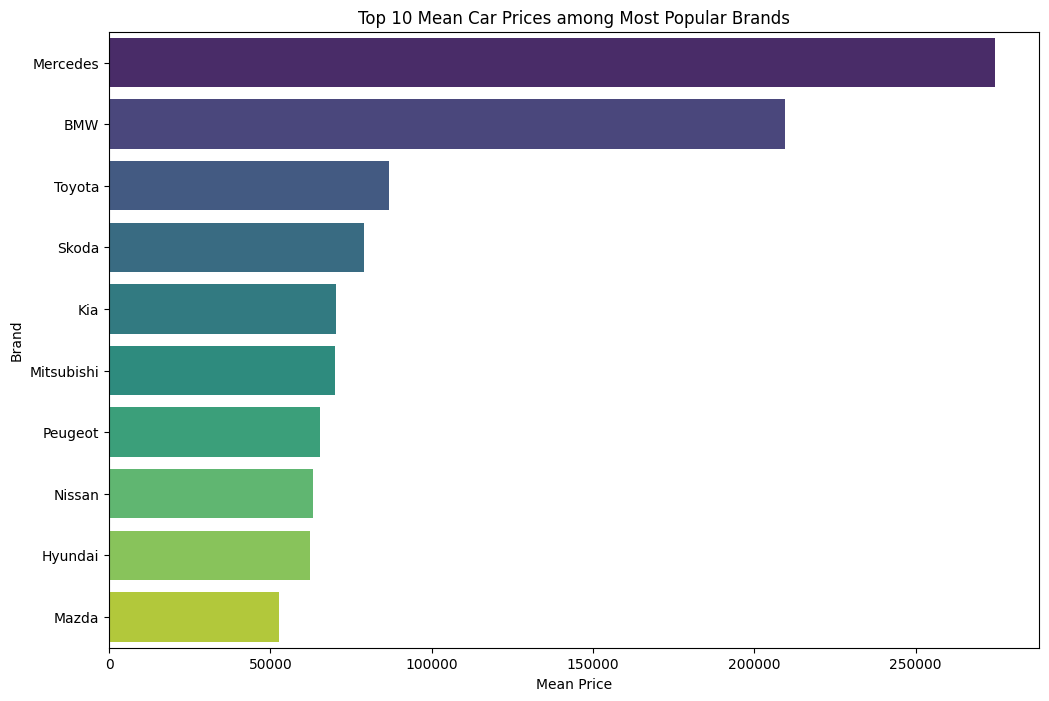

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean price per brand
mean_price_per_brand = df_car_prices_cleaned.groupby('brand')['price'].mean().sort_values(ascending=False)

# Plot the top 10 mean prices per brand
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_price_per_brand.head(10).values, y=mean_price_per_brand.head(10).index, palette='viridis')
plt.title('Top 10 Mean Car Prices per Brand')
plt.xlabel('Mean Price')
plt.ylabel('Brand')
plt.show()

# Calculate the count of cars per brand
car_count_per_brand = df_car_prices_cleaned['brand'].value_counts()

# Get the most popular car brands
most_popular_brands = car_count_per_brand.head(10).index

# Calculate the mean price for the most popular car brands
mean_price_popular_brands = df_car_prices_cleaned[df_car_prices_cleaned['brand'].isin(most_popular_brands)].groupby('brand')['price'].mean().sort_values(ascending=False)

# Plot the mean price for the most popular car brands
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_price_popular_brands.values, y=mean_price_popular_brands.index, palette='viridis')
plt.title('Top 10 Mean Car Prices among Most Popular Brands')
plt.xlabel('Mean Price')
plt.ylabel('Brand')
plt.show()

In [ ]:
df_car_prices_cleaned

,car_name_en,price,year,hand_num,car_info_en,car_tags_en,horse_power,hybrid,4x4,fuel_type,engine_volume,brand,model
0,Jeep / Jeep Wrangler long,300000.0,2021,1,4x4 unlimited sahara ot' 5 del' 2.0 (272 hp),"Magnesium wheels, fully tested, first hand",272.0,False,True,petrol,2.0,Jeep,/ Jeep Wrangler long
1,Audi Q7,216000.0,2018,2,4x4 premium electric diesel auto 5 mk 3.0 (374...,"Economical, hybrid, valid test",374.0,True,True,hybrid,3.0,Audi,Q7
2,Subaru Forester,42000.0,2011,3,4x4 b auto 2.0 (150 hp) [2008-2011],"Hard terrain, valid test, multimedia system",150.0,False,True,petrol,2.0,Subaru,Forester
3,Jeep / Jeep Grand Cherokee,160000.0,2019,1,4x4 laredo auto 5 mk 3.6 (286 hp),"Distance control, magnesium wheels, valid test",286.0,False,True,petrol,3.6,Jeep,/ Jeep Grand Cherokee
4,Toyota Land Cruiser long,123000.0,2008,1,4x4 std ot diesel 5 mk 3.0 (173 hp),"Large fuel tank, fully tested, first hand",173.0,False,True,diesel,3.0,Toyota,Land Cruiser long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,Skoda Octavia,66000.0,2018,1,ambition auto 1.0 (115 hp),"Distance control, economical",115.0,False,False,petrol,1.0,Skoda,Octavia
13486,Toyota Aygo (AYGO),19900.0,2013,4,plus robotic 1.0 (69 hp),"Economical, valid test",69.0,False,False,petrol,1.0,Toyota,Aygo (AYGO)
13487,Renault Megane Grand Coupe,49900.0,2018,4,intense ot diesel 1.5 (110 hp),"Economical, magnesium wheels",110.0,False,False,diesel,1.5,Renault,Megane Grand Coupe
13489,Nissan Juke / Juke,37990.0,2016,3,acenta auto 1.6 (117 hp),"Magnesium wheels, fully tested",117.0,False,False,petrol,1.6,Nissan,Juke / Juke


In [ ]:
# Correcting brand names in the dataframe
brand_corrections = {
    'Land': 'Land Rover',
    'Alfa': 'Alfa Romeo',
    'MINI': 'Mini',
    'Chevy': 'Chevrolet'
}

# Apply corrections to the 'brand' column
df_car_prices_cleaned['brand'] = df_car_prices_cleaned['brand'].replace(brand_corrections)


In [ ]:
df_car_prices_cleaned['brand'].unique()

array(['Mercedes', 'BMW', 'Alfa Romeo', 'Toyota', 'Hyundai', 'Skoda',
       'Renault', 'Jeep', 'Seat', 'Audi', 'Land Rover', 'Porsche',
       'Citroen', 'Geely', 'Dodge', 'Nissan', 'Suzuki', 'Mazda', 'Kia',
       'Peugeot', 'Chevrolet', 'Lexus', 'SERES', 'Tesla', 'Volkswagen',
       'Subaru', 'Mitsubishi', 'Opel', 'G. / MG', 'Cadillac', 'Honda',
       'Ford', 'Jaguar', 'Dacia', 'Genesis', 'Fiat', 'Ssangyong', 'DS',
       'Copra', 'Ora', 'MG', 'Infiniti QX50', 'Opal', 'Volvo', 'BYD',
       'GMC', 'Chrysler', 'Infiniti', 'Abarth', 'Maserati', 'Smart',
       'Eways', 'leapmotor', 'Maxx', 'Ivoco', 'Lincoln', 'Cupra', 'Mini',
       'Isuzu', 'Citroën', 'Lamborghini', 'Buick', 'SsangYong', 'McLaren',
       'Daihatsu', 'Astra', 'ZEEKR', 'Chery', 'Aston Martin', 'Polestar',
       'Lancia', 'MINI', 'Lynk&Co', 'Mann', 'Skywall', 'Chevy', 'XPENG',
       'Maxus', 'Unknown', 'Seres', 'Great Wall', 'EVEASY', 'GAC',
       'Ferrari', 'Neo / NIO', 'Bentley', 'G', 'VOYAH'], dtype=object)

In [30]:
unknown_brands = df_car_prices_cleaned[df_car_prices_cleaned['brand'] == 'Unknown']
unknown_brands


,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume
2193,The new Astra,9000.0,2022,1,gs line hatchback 1.2 (130 hp),"Distance control,Economical,Magnesium wheels",Unknown,Unknown,130.0,False,False,petrol,1.2
2265,The new Astra,9000.0,2022,1,gs line hatchback 1.2 (130 hp),"Distance control,Economical,Magnesium wheels",Unknown,Unknown,130.0,False,False,petrol,1.2
6430,Opal quarrels,17500.0,2015,1,enjoy auto 1.4 (120 hp),"Distance control,Test in force",Unknown,Unknown,120.0,False,False,petrol,1.4
6867,Opal and Yoro are long,85000.0,2018,2,van manual diesel 9 mk 1.6 (121 hp),"Financing options,on occasion",Unknown,Unknown,121.0,False,False,diesel,1.6
318,Opal quarrels,5000.0,2016,2,enjoy auto 1.4 (120 hp),NaN,Unknown,Unknown,120.0,False,False,petrol,1.4
340,Opal quarrels,5000.0,2016,2,enjoy auto 1.4 (120 hp),NaN,Unknown,Unknown,120.0,False,False,petrol,1.4


In [31]:
df_car_prices_cleaned.drop(unknown_brands.index, inplace=True)


In [32]:
df_car_prices_cleaned

,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"Hybrid,Test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid,1.3
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"Adaptive cruise control,Distance control,Hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"Distance control,Economical,Magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,petrol,2.0
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"Distance control,Economical,Magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"Distance control,Magnesium wheels,Test in force",BMW,3 Series,156.0,False,False,petrol,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0
3956,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,petrol,2.0
3957,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,petrol,1.6
3958,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,petrol,2.0


In [ ]:
# Count the occurrences of each unique value in 'car_tags_en'
car_tags_counts = df_car_prices_cleaned['car_tag'].str.split(',').explode().value_counts()

# Display the counts
car_tags_counts.nlargest(10)


car_tag
Magnesium wheels           3680
Distance control           3187
Test in force              2573
Economical                 1520
Adaptive cruise control    1258
Hybrid                      556
first hand                  530
on occasion                 305
Large fuel tank             202
extremely guarded           200
Name: count, dtype: int64

In [ ]:
car_tags_counts

car_tag
Magnesium wheels             3680
Distance control             3187
Test in force                2573
Economical                   1520
Adaptive cruise control      1258
Hybrid                        556
first hand                    530
on occasion                   305
Large fuel tank               202
extremely guarded             200
Financing options             195
Powerful engine               188
safe                          154
sun-call                      151
multimedia system             132
Large trunk                   131
electric                      118
Too bad to miss                92
Importer's responsibility      87
without accidents              87
Extra accessories              84
test drive                     74
harsh terrain                  60
גלגלי מגנזיום                  29
טסט בתוקף                      27
בקרת שמירת מרחק                18
fast acceleration              17
climate control                16
חסכוני                         11
Enviro

In [ ]:
response = model.generate_content(f"Check the car_tags_counts for unique values: {car_tags_counts}")

# Get the response for unique values check
unique_values_check = response.text

# Print the response
print("Unique values check in car_tags_counts:", unique_values_check)


NameError: name 'model' is not defined

In [39]:
# Normalize the case sensitivity in 'car_tags_en' column
df_car_prices_cleaned['car_tag'] = df_car_prices_cleaned['car_tag'].str.lower()

# Recount the occurrences of each unique value in 'car_tags_en' after normalization
car_tags_counts_normalized = df_car_prices_cleaned['car_tag'].str.split(',').explode().value_counts()

# Display the counts
car_tags_counts_normalized= car_tags_counts_normalized.reset_index()


In [1]:
# Use Gemini OpenAI to detect mistakes in brands
import pathlib
import textwrap
import google.generativeai as genai
import api_keys 

your_openai_api_key = api_keys.api_key
genai.configure(api_key=your_openai_api_key)

model = genai.GenerativeModel('gemini-1.5-flash')

c:\Users\v_gol\Desktop\Developers Institute\Car_price_prediction_bot\Israels-Car-price-predictor-Telegramm-Bot\final_proj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
car_tags_counts_normalized

,car_tag,count
0,magnesium wheels,3678
1,distance control,3185
2,test in force,2573
3,economical,1518
4,adaptive cruise control,1258
5,hybrid,556
6,first hand,530
7,on occasion,305
8,large fuel tank,202
9,extremely guarded,200


In [41]:
car_tags_counts_normalized = car_tags_counts_normalized['car_tag']
car_tags_counts_normalized 

0              magnesium wheels
1              distance control
2                 test in force
3                    economical
4       adaptive cruise control
5                        hybrid
6                    first hand
7                   on occasion
8               large fuel tank
9             extremely guarded
10            financing options
11              powerful engine
12                         safe
13                     sun-call
14            multimedia system
15                  large trunk
16                     electric
17              too bad to miss
18    importer's responsibility
19            without accidents
20            extra accessories
21                   test drive
22                harsh terrain
23                גלגלי מגנזיום
24                    טסט בתוקף
25              בקרת שמירת מרחק
26            fast acceleration
27              climate control
28                       חסכוני
29     environmentally friendly
30                     sun-roof
31      

In [44]:
list_to_check = car_tags_counts_normalized.to_list()

In [45]:
result = generate_answer(f'Check this {list_to_check}. and write down which one tags i can group together. Translate hebrew tags. This is a list of unique tags which i want to check and then make a replacement in my data set')

In [46]:
print(result)

Sure, here are the grouped tags and their translations:

1. Car type: ['hybrid', 'electric'].
2. Car Condition: ['first hand', 'on occasion', 'without accidents', 'extremely guarded', 'יד ראשונה', 'ללא תאונות', 'שמור ביותר'] Translations: 'יד ראשונה' - 'first hand'; 'ללא תאונות' - 'without accidents'; 'שמור ביותר' - 'extremely guarded'.
3. Car Capabilities: ['magnesium wheels', 'powerful engine', 'large trunk', 'large fuel tank', 'fast acceleration', 'תא מטען גדול', 'מיכל דלק גדול', 'מנוע חזק', 'תאוצה מהירה']  Translations: 'תא מטען גדול' - 'large trunk'; 'מיכל דלק גדול' - 'large fuel tank'; 'מנוע חזק' - 'powerful engine'; 'תאוצה מהירה' - 'fast acceleration'.
4. Vehicle Features: ['distance control', 'adaptive cruise control', 'multimedia system', 'sun-call', 'sun-roof', 'climate control', 'בקרת שמירת מרחק', 'בקרת שיוט אדפטיבית', 'מערכת מולטימדיה', 'סאן-רוף'] Translations: 'בקרת שמירת מרחק' - 'distance control'; 'בקרת שיוט אדפטיבית' - 'adaptive cruise control'; 'מערכת מולטימדיה' - 'mul

In [35]:
df_car_prices_cleaned.to_csv('11-06-24.data_14krows.csv')

In [ ]:
response = model.generate_content(f"Check the car_tags_counts_normalized for values which must be in one group: {car_tags_counts_normalized.to_dict()}")

# Get the response for unique values check
unique_values_check = response.text

# Print the response
print("Unique values check in car_tags_counts:", unique_values_check)


Unique values check in car_tags_counts: The provided data represents car tag counts and their normalized values. You're asking to identify tags that are conceptually similar and should be grouped together. 

Here's a breakdown of the tags and potential groupings, along with considerations:

**Group 1: Vehicle Condition and Maintenance**

* **"magnesium wheels"** - This seems out of place. It's a specific feature, not related to condition.
* **"valid test"**, **"valid test drive"**, **"valid tested in force"**, **"strictly valid tested"**, **"valid test in effect"**, **"valid tested strongly"**, **"valid test valid"**, **"tst valid"**, **"thoroughly valid tested"**, **"valid tested vigorously"**, **"strong valid test"** -  These all relate to the car passing a safety inspection or roadworthiness test.
* **"very well maintained"**, **"very well preserved"**, **"very well kept"**, **"extremely well maintained"**, **"extremely well kept"** -  These describe the car's overall condition and 

In [ ]:
# Replace 'validly tested', 'valid test' and 'fully tested' with 'valid test'
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('validly tested', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid test', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('fully tested', 'valid test', regex=False)


# Replace 'distance keeping control' with 'distance control'
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('distance keeping control', 'distance control', regex=False)

# Replace various forms of 'valid test' with 'valid test'
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid test', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('Valid test', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('VALID test', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('test', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('TEST', 'valid test', regex=False)

# Replace 'valid test strongly' and 'valid valid test' with 'valid test'
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid test strongly', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid valid test', 'valid test', regex=False)


In [ ]:
# Replace various forms of 'valid test' with 'valid test'
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid test drive', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid tested in force', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('strictly valid tested', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid test in effect', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid tested strongly', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid test valid', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('tst valid', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('thoroughly valid tested', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('valid tested vigorously', 'valid test', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('strong valid test', 'valid test', regex=False)


In [ ]:
# Replace various forms of "well preserved" with "well preserved"
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('very well maintained', 'well preserved', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('very well preserved', 'well preserved', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('very well kept', 'well preserved', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('extremely well maintained', 'well preserved', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('extremely well kept', 'well preserved', regex=False)


In [ ]:
# Replace 'no accidents' with 'without accidents'
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('no accidents', 'without accidents', regex=False)


In [ ]:
# Replace various forms of "safe" with "safe"
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('very carefully', 'safe', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('very guarded', 'safe', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('very safe', 'safe', regex=False)


In [ ]:
# Replace various forms of "distance control" with "distance control"
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('safety distance control', 'distance control', regex=False)
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('distance maintenance control', 'distance control', regex=False)


In [ ]:
# Normalize the case sensitivity in 'car_tags_en' column
df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.lower()

# Recount the occurrences of each unique value in 'car_tags_en' after normalization
car_tags_counts_normalized = df_car_prices_cleaned['car_tags_en'].str.split(', ').explode().value_counts()

# Display the counts
car_tags_counts_normalized= car_tags_counts_normalized.reset_index()
car_tags_counts_normalized.head(10)

,car_tags_en,count
0,magnesium wheels,3723
1,valid test,2657
2,distance control,2412
3,"none,data",2240
4,economical,1495
5,adaptive cruise control,1309
6,cruise control,642
7,hybrid,576
8,first hand,489
9,large fuel tank,219


In [ ]:
# # Clean the "None,Data" tag
# df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace('None,Data', 'Unknown Data', regex=False)

# # Address Typos and Standardize Formatting
# # Define a dictionary for common typos and their corrections
# typo_corrections = {
#     'Manoe Hizq': 'Manoe Hizq',  # Assuming this is a typo, replace with correct value
#     'Sun-ruf': 'Sunroof',
#     'valid test': 'Valid Test',
#     'extremely well kept': 'Extremely Well Kept',
#     'TST valid': 'Valid Test',
#     'given the opportunity': 'Given the Opportunity'
# }

# # Apply typo corrections
# for typo, correction in typo_corrections.items():
#     df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.replace(typo, correction, regex=False)

# # Standardize capitalization
# df_car_prices_cleaned['car_tags_en'] = df_car_prices_cleaned['car_tags_en'].str.title()

# df_car_prices_cleaned


In [ ]:
# Delete 'hybrid' column and 'car_name_eng' column
df_car_prices_cleaned = df_car_prices_cleaned.drop(columns=['hybrid'])

# Move 'brand' and 'model' columns to the beginning of the DataFrame
cols = ['brand', 'model'] + [col for col in df_car_prices_cleaned if col not in ['brand', 'model']]
df_car_prices_cleaned = df_car_prices_cleaned[cols]

df_car_prices_cleaned

,brand,model,car_name_en,price,year,hand_num,car_info_en,car_tags_en,horse_power,4x4,fuel_type,engine_volume
0,Jeep,/ Jeep Wrangler long,Jeep / Jeep Wrangler long,300000.0,2021,1,4x4 unlimited sahara ot' 5 del' 2.0 (272 hp),"magnesium wheels, valid test, first hand",272.0,True,petrol,2.0
1,Audi,Q7,Audi Q7,216000.0,2018,2,4x4 premium electric diesel auto 5 mk 3.0 (374...,"economical, hybrid, valid test",374.0,True,hybrid,3.0
2,Subaru,Forester,Subaru Forester,42000.0,2011,3,4x4 b auto 2.0 (150 hp) [2008-2011],"hard terrain, valid test, multimedia system",150.0,True,petrol,2.0
3,Jeep,/ Jeep Grand Cherokee,Jeep / Jeep Grand Cherokee,160000.0,2019,1,4x4 laredo auto 5 mk 3.6 (286 hp),"distance control, magnesium wheels, valid test",286.0,True,petrol,3.6
4,Toyota,Land Cruiser long,Toyota Land Cruiser long,123000.0,2008,1,4x4 std ot diesel 5 mk 3.0 (173 hp),"large fuel tank, valid test, first hand",173.0,True,diesel,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13485,Skoda,Octavia,Skoda Octavia,66000.0,2018,1,ambition auto 1.0 (115 hp),"distance control, economical",115.0,False,petrol,1.0
13486,Toyota,Aygo (AYGO),Toyota Aygo (AYGO),19900.0,2013,4,plus robotic 1.0 (69 hp),"economical, valid test",69.0,False,petrol,1.0
13487,Renault,Megane Grand Coupe,Renault Megane Grand Coupe,49900.0,2018,4,intense ot diesel 1.5 (110 hp),"economical, magnesium wheels",110.0,False,diesel,1.5
13489,Nissan,Juke / Juke,Nissan Juke / Juke,37990.0,2016,3,acenta auto 1.6 (117 hp),"magnesium wheels, valid test",117.0,False,petrol,1.6


In [ ]:
# import time

# def get_model_name(model_name, index):
#     try:
#         # Check if the index is a multiple of 500 and not the first element
#         if index % 500 == 0 and index != 0:
#             time.sleep(30)  # Pause for 30 seconds after every 500 requests to maintain less than 2 requests per second
#         response = model.generate_content(f"Clean the following model name: {model_name}. Return only the cleaned model name and nothing else.")
#         return response.text
#     except Exception as e:
#         error_message = str(e)
#         if "429 Resource has been exhausted" in error_message:
#             print(f"API quota exceeded while cleaning model name {model_name}: {error_message}")
#         else:
#             print(f"Error cleaning model name {model_name}: {error_message}")
#         return model_name  # Return the original model name in case of an error

# # Apply the function with index
# df_car_prices_cleaned['mode_gemini'] = df_car_prices_cleaned.apply(lambda row: get_model_name(row['model'], row.name), axis=1)


In [ ]:
response = model.generate_content(f"Clean the following model name: 'Corolla Hybrid'. Return only the cleaned model name and nothing else.")

In [ ]:
unique_values_model = df_car_prices_cleaned['model'].unique()

response = model.generate_content(f"Check in the following list of ubique. Find Potential Issues and write recommendations.: {unique_values_model}")
# Print the unique values from the model column
print("Unique values in model column:", response.text)


In [ ]:
model_unique = df_car_prices_cleaned['model'].unique()
model_unique

brand_unique = df_car_prices_cleaned['brand'].unique()
brand_unique

car_name_unique = df_car_prices_cleaned['car_name_en'].unique()
car_name_unique


In [ ]:
model_unique

array(['/ Jeep Wrangler long', 'Q7', 'Forester', '/ Jeep Grand Cherokee',
       'Land Cruiser long', 'Kamik', 'Qashqai', 'E-Class', 'Santa Fe',
       'Rexton', 'i30', 'Ioniq', 'X2', 'Camaro', 'Sportage', 'CX-5',
       'Outlander', '3', 'Corolla Hybrid', 'X-Trail', 'Micra', '6', 'Q5',
       '7 Series', 'S60', 'GLE Coupe', 'Q2', 'Niro Hybrid', '3008',
       'Sentra', 'Romeo Stelvio', 'Seltos', 'Tiguan', 'C-HR', 'S-Class',
       'Corolla', 'Duster', '/ Ora Funky Cat',
       '/ DS DS7 Crossback / Crossback', 'Vivant', 'Jetta', 'Tucson',
       'Formentor', 'Astra', 'Superb (2019 onwards)', 'E-tron Q4', 'A3',
       'i20', 'Niro EV', 'Octavia', '/ Jeep Wrangler short',
       'Sonata Hybrid', 'buys', 'E-tron', 'Model X', 'Picanto',
       'Grand Scenic', 'Ducato long', 'Q3', 'Bayon', 'I-Pace',
       'Pajero short', 'Megane 3rd generation (2009-2017)',
       'Rover Defender', 'Sorento', 'City', 'Ioniq 6', '- Polo', 'Arona',
       'commercial/passenger transporter', 'XV', 'Traverse'

In [ ]:
response = model.generate_content(f"Check in the following list of brand-models. Find Potential Issues and write recommendations.: {car_name_unique}")
# Print the unique values from the model column
print("Unique values in model column:", response.text)

Unique values in model column: ## Potential Issues and Recommendations in the Brand-Model List:

This list contains various potential issues, including:

**1. Typos and Inconsistent Naming:**

* **"Jeep / Jeep Wrangler long"**:  It's unclear what "long" refers to. It could be a specific trim or model variant. 
    * **Recommendation:** Clarify the "long" attribute with a specific trim name (e.g., Jeep Wrangler Unlimited). 
* **"Toyota Land Cruiser long"**: Same as above.
    * **Recommendation:** Clarify with a specific trim name (e.g., Toyota Land Cruiser 200 Series).
* **"Skoda Superb (2019 onwards)"**:  It should be consistent with "Skoda Superb (until 2019)"
    * **Recommendation:**  Use consistent naming for both model years. 
* **"Fiat Ducato long"**:  Same as above.
    * **Recommendation:** Use a specific trim or model year (e.g., Fiat Ducato L4H2).
* **"Citroen Jumpy short/medium"**:   Same as above.
    * **Recommendation:**  Use specific trim names for different lengths.
* 

In [ ]:
# Standardize formatting, remove unnecessary spaces, and capitalize model names
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].str.strip().str.replace('/', '').str.capitalize()

# Remove brand names from the model column if they are present
df_car_prices_cleaned['model'] = df_car_prices_cleaned.apply(lambda row: row['model'].lower().replace(row['brand'].lower(), '').strip(), axis=1)

# Clarify model variants by replacing generic terms with specific model names
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace({
    'Land cruiser long': 'Land Cruiser Long',
    'Land cruiser short': 'Land Cruiser Short',
    'Hilux 4x4': 'Hilux Off-Road',
    'Hilux 2x4': 'Hilux',
    'Triton / L200 4x4': 'L200',
    'Clio 4th generation (2013-2019)': 'Renault Clio IV',
    'Clio 5th generation (2019 onwards)': 'Renault Clio V'
})

# Remove duplicate entries and clarify categories
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace({
    'Juke / Juke': 'Juke',
    'Commercial/passenger transporter': 'Commercial Transporter'
})

# Display the cleaned DataFrame
df_car_prices_cleaned

,brand,model,car_name_en,price,year,hand_num,car_info_en,car_tags_en,horse_power,4x4,fuel_type,engine_volume
0,Jeep,wrangler long,Jeep / Jeep Wrangler long,300000.0,2021,1,4x4 unlimited sahara ot' 5 del' 2.0 (272 hp),"magnesium wheels, valid test, first hand",272.0,True,petrol,2.0
1,Audi,q7,Audi Q7,216000.0,2018,2,4x4 premium electric diesel auto 5 mk 3.0 (374...,"economical, hybrid, valid test",374.0,True,hybrid,3.0
2,Subaru,forester,Subaru Forester,42000.0,2011,3,4x4 b auto 2.0 (150 hp) [2008-2011],"hard terrain, valid test, multimedia system",150.0,True,petrol,2.0
3,Jeep,grand cherokee,Jeep / Jeep Grand Cherokee,160000.0,2019,1,4x4 laredo auto 5 mk 3.6 (286 hp),"distance control, magnesium wheels, valid test",286.0,True,petrol,3.6
4,Toyota,land cruiser long,Toyota Land Cruiser long,123000.0,2008,1,4x4 std ot diesel 5 mk 3.0 (173 hp),"large fuel tank, valid test, first hand",173.0,True,diesel,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13485,Skoda,octavia,Skoda Octavia,66000.0,2018,1,ambition auto 1.0 (115 hp),"distance control, economical",115.0,False,petrol,1.0
13486,Toyota,aygo (aygo),Toyota Aygo (AYGO),19900.0,2013,4,plus robotic 1.0 (69 hp),"economical, valid test",69.0,False,petrol,1.0
13487,Renault,megane grand coupe,Renault Megane Grand Coupe,49900.0,2018,4,intense ot diesel 1.5 (110 hp),"economical, magnesium wheels",110.0,False,diesel,1.5
13489,Nissan,juke juke,Nissan Juke / Juke,37990.0,2016,3,acenta auto 1.6 (117 hp),"magnesium wheels, valid test",117.0,False,petrol,1.6


In [ ]:
# Remove 'hybrid' and 'taxi' from the model names
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(lambda x: x.lower().replace('hybrid', '').replace('taxi', '').strip())


In [ ]:
df_car_prices_cleaned

,brand,model,car_name_en,price,year,hand_num,car_info_en,car_tags_en,horse_power,4x4,fuel_type,engine_volume
0,Jeep,wrangler long,Jeep / Jeep Wrangler long,300000.0,2021,1,4x4 unlimited sahara ot' 5 del' 2.0 (272 hp),"magnesium wheels, valid test, first hand",272.0,True,petrol,2.0
1,Audi,q7,Audi Q7,216000.0,2018,2,4x4 premium electric diesel auto 5 mk 3.0 (374...,"economical, hybrid, valid test",374.0,True,hybrid,3.0
2,Subaru,forester,Subaru Forester,42000.0,2011,3,4x4 b auto 2.0 (150 hp) [2008-2011],"hard terrain, valid test, multimedia system",150.0,True,petrol,2.0
3,Jeep,grand cherokee,Jeep / Jeep Grand Cherokee,160000.0,2019,1,4x4 laredo auto 5 mk 3.6 (286 hp),"distance control, magnesium wheels, valid test",286.0,True,petrol,3.6
4,Toyota,land cruiser long,Toyota Land Cruiser long,123000.0,2008,1,4x4 std ot diesel 5 mk 3.0 (173 hp),"large fuel tank, valid test, first hand",173.0,True,diesel,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13485,Skoda,octavia,Skoda Octavia,66000.0,2018,1,ambition auto 1.0 (115 hp),"distance control, economical",115.0,False,petrol,1.0
13486,Toyota,aygo (aygo),Toyota Aygo (AYGO),19900.0,2013,4,plus robotic 1.0 (69 hp),"economical, valid test",69.0,False,petrol,1.0
13487,Renault,megane grand coupe,Renault Megane Grand Coupe,49900.0,2018,4,intense ot diesel 1.5 (110 hp),"economical, magnesium wheels",110.0,False,diesel,1.5
13489,Nissan,juke,Nissan Juke / Juke,37990.0,2016,3,acenta auto 1.6 (117 hp),"magnesium wheels, valid test",117.0,False,petrol,1.6


In [ ]:
# Check for doubling of the model name in the 'model' column and correct it
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))


In [ ]:
# Check for non-letters and non numbers in models and remove them
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)


In [ ]:
df_unique_models = pd.DataFrame(df_car_prices_cleaned['model'].unique(), columns=['unique_models'])
df_unique_models


,unique_models
0,wrangler long
1,q7
2,forester
3,grand cherokee
4,land cruiser long
...,...
623,solstice
624,b2500 4x4
625,and yoro are long
626,twingo


In [ ]:
response = model.generate_content(f"Check in the following list of models. Find out models which must be groupped in one or corrected.: {df_unique_models.to_dict()}")
# Print the unique values from the model column
print("Unique values in model column:", response.text)

Unique values in model column: Let's clean up this list of car models! Here's a breakdown of the issues and how to fix them:

**Issues**

* **Incomplete Models:**  Many entries are missing parts of the model name (e.g., "q", "x", "s", "e").  These need to be completed to be useful.
* **Redundant Models:** Some models are repeated with slight variations that are essentially the same car (e.g., "qashqai" and "qashqai plus"). 
* **Unclear Model Naming:**  Some models have phrases like "onwards" or "until" that make their meaning unclear. 
* **Non-Car Models:** There are some entries that aren't car models at all (e.g., "iphone x", "is buying an ev").

**Grouping and Corrections**

Here's a revised list with grouping and corrections applied:

```python
unique_models = {
    0: 'Wrangler',
    1: 'Audi Q',  # Assume this refers to a general Audi Q series
    2: 'Forester',
    3: 'Grand Cherokee',
    4: 'Land Cruiser',
    5: 'Škoda Kamiq', 
    6: 'Qashqai', 
    7: 'Tesla Model E', # Ass

In [ ]:
# Group submodels with their main models
def group_submodels(model):
    submodel_groups = {
        'wrangler': ['wrangler long', 'wrangler short'],
        'land cruiser': ['land cruiser long', 'land cruiser short'],
        'pajero': ['pajero long', 'pajero short'],
        'niro': ['niro', 'niro ev', 'niro plus'],
        'outlander': ['outlander', 'outlander phev'],
        'berlingo': ['berlingo rd generation onwards', 'berlingo nd generation', 'berlingo st generation until'],
        'ducato': ['ducato long', 'ducato shortmedium'],
        'master': ['master long', 'master shortmedium'],
        'trooper': ['trooper long', 'short trooper'],
        'land cruiser pardo': ['land cruiser pardo long', 'land cruiser pardo short'],
        'savanna': ['savanna long', 'savanna short'],
        'trafic': ['trafic is long'],
        'transit': ['transit', 'transit custom'],
        'hiace': ['hiace short'],
        'tourneo connect': ['tourneo connect short']
    }
    
    for main_model, submodels in submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_submodels)


In [ ]:
# Group additional submodels with their main models
def group_additional_submodels(model):
    additional_submodel_groups = {
        'civic': ['civic', 'civic up to'],
        'corolla': ['corolla', 'corolla runx'],
        'romeo': ['romeo giulietta', 'romeo gt'],
        'lancer': ['lancer the new generation', 'lancer classic'],
        'prius': ['prius', 'prius plus'],
        'sonata': ['sonata', 'sonata n']
    }
    
    for main_model, submodels in additional_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_additional_submodels)


In [ ]:
# Group additional submodels with their main models
def group_megane_submodels(model):
    megane_submodel_groups = {
        'megane': ['megane rd generation', 'megane etech', 'megane estate grand tour', 'megane nd generation', 'megane grand coupe']
    }
    
    for main_model, submodels in megane_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_megane_submodels)


In [ ]:
# Group GL submodels with their main models
def group_gl_submodels(model):
    gl_submodel_groups = {
        'gl': ['gle', 'gle coupe', 'glcclass coupe']
    }
    
    for main_model, submodels in gl_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_gl_submodels)


In [ ]:
# Group E and A submodels with their main models
def group_e_a_submodels(model):
    e_a_submodel_groups = {
        'e': ['eclass', 'eclass coupe cabriolet'],
        'a': ['a', 'aclass']
    }
    
    for main_model, submodels in e_a_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_e_a_submodels)


In [ ]:
# Group C-Class submodels with their main models
def group_c_class_submodels(model):
    c_class_submodel_groups = {
        'c': ['c class', 'cclass coupe cabriolet', 'cclass']
    }
    
    for main_model, submodels in c_class_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_c_class_submodels)


In [ ]:
# Group G-Class submodels with their main models
def group_g_class_submodels(model):
    g_class_submodel_groups = {
        'g': ['g class', 'g']
    }
    
    for main_model, submodels in g_class_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_g_class_submodels)


In [ ]:

# Group Clio submodels with their main models
def group_clio_submodels(model):
    clio_submodel_groups = {
        'clio': ['clio estate', 'clio rd generation', 'clio th generation', 'clio th generation onwards']
    }
    
    for main_model, submodels in clio_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_clio_submodels)

# Group Civic submodels with their main models
def group_civic_submodels(model):
    civic_submodel_groups = {
        'civic': ['civic', 'civic station', 'civic typer']
    }
    
    for main_model, submodels in civic_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_civic_submodels)

# Group Golf submodels with their main models
def group_golf_submodels(model):
    golf_submodel_groups = {
        'golf': ['golf', 'golf plus', 'golf gti']
    }
    
    for main_model, submodels in golf_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_golf_submodels)

# Group Polo submodels with their main models
def group_polo_submodels(model):
    polo_submodel_groups = {
        'polo': ['polo', 'polo gti']
    }
    
    for main_model, submodels in polo_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_polo_submodels)

# Group Octavia submodels with their main models
def group_octavia_submodels(model):
    octavia_submodel_groups = {
        'octavia': ['octavia', 'octavia spice', 'octavia rs']
    }
    
    for main_model, submodels in octavia_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_octavia_submodels)



In [ ]:
# Group Grand Cherokee submodels with their main models
def group_grand_cherokee_submodels(model):
    grand_cherokee_submodel_groups = {
        'grand cherokee': ['grand cherokee', 'grand cherokee up to']
    }
    
    for main_model, submodels in grand_cherokee_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_grand_cherokee_submodels)

# Group Accent submodels with their main models
def group_accent_submodels(model):
    accent_submodel_groups = {
        'accent': ['accent up to']
    }
    
    for main_model, submodels in accent_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_accent_submodels)

# Group Transit submodels with their main models
def group_transit_submodels(model):
    transit_submodel_groups = {
        'transit': ['transit']
    }
    
    for main_model, submodels in transit_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_transit_submodels)


In [ ]:
# Group Hilux submodels with their main models
def group_hilux_submodels(model):
    hilux_submodel_groups = {
        'hilux': ['hilux x', 'hilux vigo x']
    }
    
    for main_model, submodels in hilux_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_hilux_submodels)


In [ ]:
# Group Qashqai submodels with their main models
def group_qashqai_submodels(model):
    qashqai_submodel_groups = {
        'qashqai': ['qashqai', 'qashqai plus']
    }
    
    for main_model, submodels in qashqai_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_qashqai_submodels)


In [ ]:
# Group Cayenne submodels with their main models
def group_cayenne_submodels(model):
    cayenne_submodel_groups = {
        'cayenne': ['cayenne', 'cayenne turbo']
    }
    
    for main_model, submodels in cayenne_submodel_groups.items():
        if model.lower() in submodels:
            return main_model
    return model

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(group_cayenne_submodels)


In [56]:
df_unique_models = pd.DataFrame(df_car_prices_cleaned['model'].unique(), columns=['unique_models'])
df_unique_models

,unique_models
0,A-Class
1,7 Series
2,Giulia
3,S-Class
4,3 Series
...,...
618,718 Cayman
619,S80
620,316
621,Trooper


In [ ]:
# # Capitalize every 'q' letter in the 'model' column for the brand 'Audi'
# df_car_prices_cleaned.loc[df_car_prices_cleaned['brand'].str.lower() == 'audi', 'model'] = df_car_prices_cleaned['model'].apply(lambda x: ''.join('Q' if char == 'q' else char for char in x))
# df_car_prices_cleaned

In [ ]:
# Count the occurrences of each unique value in 'car_tags_en'
car_tags_counts = df_car_prices_cleaned['car_tags_en'].str.split(', ').explode().value_counts()

# Display the counts
car_tags_counts.head(10)

car_tags_en
magnesium wheels           3723
valid test                 2657
distance control           2412
none,data                  2240
economical                 1495
adaptive cruise control    1309
cruise control              642
hybrid                      576
first hand                  489
large fuel tank             219
Name: count, dtype: int64

In [48]:
# Create columns for specific car tags and initialize them with False
df_car_prices_cleaned['magnesium_wheels'] = False
df_car_prices_cleaned['valid_test'] = False
df_car_prices_cleaned['distance_control'] = False
df_car_prices_cleaned['economical'] = False
df_car_prices_cleaned['adaptive_cruise_control'] = False
df_car_prices_cleaned['cruise_control'] = False

# Set the columns to True where 'car_tags_en' contains the specific tag
df_car_prices_cleaned.loc[df_car_prices_cleaned['car_tag'].str.contains('magnesium wheels|גלגלי מגנזיום', na=False), 'magnesium_wheels'] = True
df_car_prices_cleaned.loc[df_car_prices_cleaned['car_tag'].str.contains('valid test|test|test in force|טסט בתוקף', na=False), 'valid_test'] = True
df_car_prices_cleaned.loc[df_car_prices_cleaned['car_tag'].str.contains('distance control|בקרת שמירת מרחק', na=False), 'distance_control'] = True
df_car_prices_cleaned.loc[df_car_prices_cleaned['car_tag'].str.contains('economical|חסכוני', na=False), 'economical'] = True
df_car_prices_cleaned.loc[df_car_prices_cleaned['car_tag'].str.contains('adaptive cruise control|בקרת שיוט אדפטיבית', na=False), 'adaptive_cruise_control'] = True
df_car_prices_cleaned.loc[df_car_prices_cleaned['car_tag'].str.contains('cruise control|בקרת שיוט אדפטיבית', na=False), 'cruise_control'] = True

# Display the DataFrame with new columns
df_car_prices_cleaned


,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume,magnesium_wheels,valid_test,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"hybrid,test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid,1.3,False,True,False,False,False,False
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"adaptive cruise control,distance control,hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"distance control,economical,magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,petrol,2.0,True,False,True,True,False,False
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"distance control,economical,magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0,True,False,True,True,False,False
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"distance control,magnesium wheels,test in force",BMW,3 Series,156.0,False,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0,False,False,False,False,False,False
3956,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,petrol,2.0,False,False,False,False,False,False
3957,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,petrol,1.6,False,False,False,False,False,False
3958,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,petrol,2.0,False,False,False,False,False,False


In [49]:
df_car_prices_cleaned.to_csv('11-06-24.data_14krows.csv')

In [50]:
# Calculate the average price by brand
average_price_by_brand = df_car_prices_cleaned.groupby('brand')['price'].mean().sort_values(ascending=False)

# Display the average price by brand
average_price_by_brand


brand
McLaren        2.800000e+06
Lamborghini    2.309600e+06
Ferrari        1.599000e+06
Suzuki         7.610468e+05
Neo / NIO      4.700000e+05
                   ...     
Daihatsu       1.422585e+04
Great Wall     1.350000e+04
Lancia         9.750000e+03
Chevy          7.937500e+03
GAC            5.000000e+03
Name: price, Length: 86, dtype: float64

In [58]:
df_car_prices_cleaned

,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume,magnesium_wheels,valid_test,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"hybrid,test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid,1.3,False,True,False,False,False,False
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"adaptive cruise control,distance control,hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"distance control,economical,magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,petrol,2.0,True,False,True,True,False,False
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"distance control,economical,magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0,True,False,True,True,False,False
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"distance control,magnesium wheels,test in force",BMW,3 Series,156.0,False,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0,False,False,False,False,False,False
3956,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,petrol,2.0,False,False,False,False,False,False
3957,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,petrol,1.6,False,False,False,False,False,False
3958,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,petrol,2.0,False,False,False,False,False,False


In [71]:
unique_model = df_car_prices_cleaned['model'].unique().tolist()
unique_model

['A-Class',
 '7 Series',
 'Giulia',
 'S-Class',
 '3 Series',
 'Sequoia',
 'Santa Fe',
 'Karoq',
 'i20',
 'Clio Estate',
 'Compass',
 'Leon',
 'Mito',
 'Q2',
 'Range Rover Sport',
 'Jeep Wrangler long',
 'Sprinter',
 'Cayenne',
 'Berlingo',
 'Geely Geometry C',
 'Ram',
 'Micra',
 'Qashqai',
 'Ioniq',
 'Ignis',
 'i10',
 '3',
 'Sportage',
 '208',
 'GLC',
 'Sonata Hybrid',
 'Picanto',
 'Trax',
 'X-Trail',
 'Octavia',
 'Corolla Hybrid',
 'RX350',
 'SERES 3',
 'Savanna',
 'Model 3',
 'Spark',
 'Tiguan',
 'Forester',
 'Q7',
 'Grand Cherokee',
 'Land Cruiser',
 'Stelvio',
 'Eclipse Cross',
 'Insignia',
 '3008',
 'Tucson',
 'GLE',
 'New',
 'Trail Blazer',
 '6',
 'X6',
 '5008',
 'Marvel R',
 'Grand Scenic',
 'Yaris',
 'Megane Estate/ Grand Tour',
 'ASX',
 'Citigo',
 'SX4 crossover',
 'ML Class',
 'CX-5',
 'CEED',
 'Jetta',
 'Vitra',
 'C-Class',
 'i30',
 'Captiva',
 'Kodiaq',
 'E-Class',
 'Impreza Turbo',
 'Giulietta',
 'X4',
 'XT4',
 'Megane Grand Coupe',
 ' Arona',
 'Scala',
 'Hilux',
 'EQC',
 

In [78]:
df_car_prices_cleaned = df_car_prices_cleaned.reset_index(drop=True)

In [79]:
import numpy as np
df_car_prices_cleaned_copy = df_car_prices_cleaned.copy()
# Function to find outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

for model in unique_model:
    outbond = find_outliers_iqr(df_car_prices_cleaned[df_car_prices_cleaned['model']==model],'price')
    outbond
    df_car_prices_cleaned_copy.drop(outbond.index, inplace=True)

In [80]:
df_car_prices_cleaned_copy

,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume,magnesium_wheels,valid_test,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes A-Class,210000.0,2022,1,a250 exc plus hybrid hatchback 1.3 (160 hp),"hybrid,test in force,first hand",Mercedes,A-Class,160.0,True,False,hybrid,1.3,False,True,False,False,False,False
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"adaptive cruise control,distance control,hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo Giulia,92400.0,2018,1,milano auto 2.0 (197 hp),"distance control,economical,magnesium wheels",Alfa Romeo,Giulia,197.0,False,False,petrol,2.0,True,False,True,True,False,False
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"distance control,economical,magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0,True,False,True,True,False,False
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"distance control,magnesium wheels,test in force",BMW,3 Series,156.0,False,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13958,Hyundai Sonata Hybrid,64000.0,2017,2,premium hybrid ot 2.0 (154 hp),NaN,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0,False,False,False,False,False,False
13959,Ford Edge / EDGE,164900.0,2022,1,titanium plus automatic 2.0 (248 hp),NaN,Ford,Edge,248.0,False,False,petrol,2.0,False,False,False,False,False,False
13960,Kia Sportage,100900.0,2021,1,turbo top auto 1.6 (177 hp),NaN,Kia,Sportage,177.0,False,False,petrol,1.6,False,False,False,False,False,False
13961,BMW X4,309800.0,2022,1,4x4 xdrive 20i m-sport 2.0 (184 כ''ס),NaN,BMW,X4,NaN,False,True,petrol,2.0,False,False,False,False,False,False


In [64]:
import numpy as np

# Function to find outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers for each brand
outliers_by_brand = find_outliers_iqr(df_car_prices_cleaned,'price')
outliers_by_brand

,car_name,price,year,hand_num,car_info,car_tag,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume,magnesium_wheels,valid_test,distance_control,economical,adaptive_cruise_control,cruise_control
1,BMW 7 Series,284700.0,2019,1,740le iper luxury hybrid auto 2.0 (258 hp),"adaptive cruise control,distance control,hybrid",BMW,7 Series,258.0,True,False,hybrid,2.0,False,False,True,False,True,True
3,Mercedes S-Class,285900.0,2017,2,s350d long vision ot diesel 3.0 (258 hp),"distance control,economical,magnesium wheels",Mercedes,S-Class,258.0,False,False,diesel,3.0,True,False,True,True,False,False
4,BMW 3 Series,299000.0,2024,1,318i business auto 2.0 (156 hp),"distance control,magnesium wheels,test in force",BMW,3 Series,156.0,False,False,petrol,2.0,True,True,True,False,False,False
16,Land Rover Range Rover Sport,382400.0,2019,2,phev hse dp hybrid ute 2.0 (404 hp),"test in force,extremely guarded,on occasion",Land Rover,Range Rover Sport,404.0,True,False,hybrid,2.0,False,True,False,False,False,False
17,Jeep / Jeep Wrangler long,250000.0,2019,4,4x4 rubicon auto 3.6 (280 hp),"adaptive cruise control,magnesium wheels,test ...",Jeep,Jeep Wrangler long,280.0,False,True,petrol,3.6,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,Kia Sorento,256994.0,2024,1,ex ot' 7 mk 2.5 (180 hp),NaN,Kia,Sorento,180.0,False,False,petrol,2.5,False,False,False,False,False,False
3942,Jeep / Jeep Avenger/ AVENGER,249000.0,2024,0,4x2 first edition electric auto (156 hp),NaN,Jeep,Avenger,156.0,False,False,electric,NaN,False,False,False,False,False,False
3943,Mercedes EQS,979000.0,2022,1,eqs580 4m platinum plus ev electric auto (523 ...,"distance control,economical,electric",Mercedes,EQS,523.0,False,False,electric,NaN,False,False,True,True,False,False
3951,Audi E-tron,314000.0,2021,2,4x4 advanced electric auto (408 hp),NaN,Audi,E-tron,408.0,False,True,electric,NaN,False,False,False,False,False,False


In [ ]:

# Drop the outlier rows
df_car_prices_cleaned.drop(outliers_by_brand.index, inplace=True)

In [81]:
# Calculate the average price by brand
average_price_by_brand = df_car_prices_cleaned.groupby('brand')['price'].mean().sort_values(ascending=False)

# Display the average price by brand
average_price_by_brand


brand
McLaren        2.800000e+06
Lamborghini    2.309600e+06
Ferrari        1.599000e+06
Suzuki         7.610468e+05
Neo / NIO      4.700000e+05
                   ...     
Daihatsu       1.422585e+04
Great Wall     1.350000e+04
Lancia         9.750000e+03
Chevy          7.937500e+03
GAC            5.000000e+03
Name: price, Length: 86, dtype: float64

In [84]:
df_car_prices_cleaned_copy.to_csv('11-06-24.data_14krows.csv')
df_car_prices_cleaned = df_car_prices_cleaned_copy

In [ ]:
response = model.generate_content(f"Check in the following list of unique_brand_model_dict. Find out pairs which must be corrected.: {unique_brand_model_dict}")
# Print the unique values from the model column
print("Unique values in model column:", response.text)

Unique values in model column: Here's a breakdown of the unique_brand_model_dict pairs that need correction, along with explanations:

**Incorrect Pairs:**

* **'BMW': 'Series Coupe Cabriolet'** - This is too general.  BMW has specific model names like "3 Series Coupe" or "4 Series Cabriolet."
* **'Mazda': 'B X'** -  This is likely a typo for "BX" which isn't a standard Mazda model.  Correct models might be "CX-5," "Mazda3," etc.
* **'Mitsubishi': 'Magnum X'** -  The "Magnum" model is associated with Dodge.  Mitsubishi could have models like "Outlander" or "Eclipse Cross."
* **'Opel': 'And Yoro Are Long'** - This appears to be a completely made-up model name. Opel has models like "Astra," "Corsa," etc.
* **'Seat': 'Althea Xl'** - "Altea" is a past model, "Xl" is not a model name. Correct models might be "Leon," "Ibiza," etc. 
* **'Land Rover': 'Rover Freelander'** - "Freelander" is a past model name that was discontinued. Current Land Rover models include "Range Rover," "Defender," etc

In [ ]:
# Correct the model name for Aston Martin
df_car_prices_cleaned['model'] = df_car_prices_cleaned.apply(
    lambda row: 'DB' + row['model'].split('Db')[-1] if row['brand'] == 'Aston Martin' and 'Db' in row['model'] else row['model'],
    axis=1
)


In [ ]:
df_car_prices_cleaned

,brand,model,car_name_en,price,year,hand_num,car_info_en,car_tags_en,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
331,Mercedes-Benz,Glc,Mercedes GLC,326200.0,2022,2,4x4 glc300 premium auto 2.0 (255 hp),"distance control, magnesium wheels, valid test",255.0,True,petrol,2.0,True,True,True,False,False,False
333,BMW,7 Series,BMW 7 Series,218000.0,2017,3,740li luxury auto 3.0 (326 hp),"economical, magnesium wheels, valid test",326.0,False,petrol,3.0,True,True,False,True,False,False
334,Skoda,Superb Until 2019,Skoda Superb (until 2019),78000.0,2016,2,ambition auto 1.8 (180 hp),"distance control, economical, magnesium wheels",180.0,False,petrol,1.8,False,True,True,True,False,False
336,Ford,Explorer,Ford Explorer,69000.0,2013,4,4x4 limited auto 7 mk 3.5 (290 hp),"distance control, magnesium wheels, valid test",290.0,True,petrol,3.5,True,True,True,False,False,False
337,Toyota,Corolla Hybrid,Toyota Corolla Hybrid,3000.0,2020,1,sun sedan auto 1.8 (98 hp),"distance control, magnesium wheels, hybrid",98.0,False,hybrid,1.8,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,Skoda,Octavia,Skoda Octavia,66000.0,2018,1,ambition auto 1.0 (115 hp),"distance control, economical",115.0,False,petrol,1.0,False,False,True,True,False,False
13486,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,plus robotic 1.0 (69 hp),"economical, valid test",69.0,False,petrol,1.0,True,False,False,True,False,False
13487,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,intense ot diesel 1.5 (110 hp),"economical, magnesium wheels",110.0,False,diesel,1.5,False,True,False,True,False,False
13489,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,acenta auto 1.6 (117 hp),"magnesium wheels, valid test",117.0,False,petrol,1.6,True,True,False,False,False,False


In [ ]:
df_car_prices_cleaned = df_car_prices_cleaned.dropna(subset=['model'])


In [86]:
# Drop 'car_info_en' and 'car_tags_en' columns from the DataFrame
df_car_prices_cleaned.drop(columns=['car_info', 'car_tag'], inplace=True)
df_car_prices_cleaned

,car_name,price,year,hand_num,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume,magnesium_wheels,valid_test,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes A-Class,210000.0,2022,1,Mercedes,A-Class,160.0,True,False,hybrid,1.3,False,True,False,False,False,False
1,BMW 7 Series,284700.0,2019,1,BMW,7 Series,258.0,True,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo Giulia,92400.0,2018,1,Alfa Romeo,Giulia,197.0,False,False,petrol,2.0,True,False,True,True,False,False
3,Mercedes S-Class,285900.0,2017,2,Mercedes,S-Class,258.0,False,False,diesel,3.0,True,False,True,True,False,False
4,BMW 3 Series,299000.0,2024,1,BMW,3 Series,156.0,False,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13958,Hyundai Sonata Hybrid,64000.0,2017,2,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0,False,False,False,False,False,False
13959,Ford Edge / EDGE,164900.0,2022,1,Ford,Edge,248.0,False,False,petrol,2.0,False,False,False,False,False,False
13960,Kia Sportage,100900.0,2021,1,Kia,Sportage,177.0,False,False,petrol,1.6,False,False,False,False,False,False
13961,BMW X4,309800.0,2022,1,BMW,X4,NaN,False,True,petrol,2.0,False,False,False,False,False,False


In [ ]:
# Replace '- polo' with 'Polo' in the 'model' column
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('- polo', 'Polo', regex=True)
# Replace '-  geometry c' with 'Geometry C' in the 'model' column
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('-  geometry c', 'Geometry C', regex=True)
# Replace '7 crossback crossback' with '7' in the 'model' column
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('7 crossback  crossback', '7', regex=True)
# Replace 'Commercialpassenger transporter' with 'Transporter' in the 'model' column
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('Commercialpassenger transporter', 'Transporter', regex=True)

# If 'model' contains 'Corolla', keep only 'Corolla'
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].apply(lambda x: 'Corolla' if 'Corolla' in x else x)

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('Cr-v', 'CR-V', regex=True)

df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('Eqa', 'EQA', regex=True)
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('Eqb', 'EQB', regex=True)
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('Eqc', 'EQC', regex=True)


In [ ]:
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('Wrangler long', 'Wrangler', regex=True)
df_car_prices_cleaned['model'] = df_car_prices_cleaned['model'].replace('Wrangler short', 'Wrangler', regex=True)

df_car_prices_cleaned

,brand,model,car_name_en,price,year,hand_num,horse_power,4x4,fuel_type,engine_volume,valid_test,magnesium_wheels,distance_control,economical,adaptive_cruise_control,cruise_control
331,Mercedes-Benz,Glc,Mercedes GLC,326200.0,2022,2,255.0,True,petrol,2.0,True,True,True,False,False,False
333,BMW,7 Series,BMW 7 Series,218000.0,2017,3,326.0,False,petrol,3.0,True,True,False,True,False,False
334,Skoda,Superb Until 2019,Skoda Superb (until 2019),78000.0,2016,2,180.0,False,petrol,1.8,False,True,True,True,False,False
336,Ford,Explorer,Ford Explorer,69000.0,2013,4,290.0,True,petrol,3.5,True,True,True,False,False,False
337,Toyota,Corolla,Toyota Corolla Hybrid,3000.0,2020,1,98.0,False,hybrid,1.8,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,Skoda,Octavia,Skoda Octavia,66000.0,2018,1,115.0,False,petrol,1.0,False,False,True,True,False,False
13486,Toyota,Aygo Aygo,Toyota Aygo (AYGO),19900.0,2013,4,69.0,False,petrol,1.0,True,False,False,True,False,False
13487,Renault,Megane,Renault Megane Grand Coupe,49900.0,2018,4,110.0,False,diesel,1.5,False,True,False,True,False,False
13489,Nissan,Juke,Nissan Juke / Juke,37990.0,2016,3,117.0,False,petrol,1.6,True,True,False,False,False,False


In [87]:
df_car_prices_cleaned = df_car_prices_cleaned[df_car_prices_cleaned['price'] >= 0]

In [88]:
df_car_prices_cleaned

,car_name,price,year,hand_num,brand,model,horse_power,hybrid,4x4,fuel_type,engine_volume,magnesium_wheels,valid_test,distance_control,economical,adaptive_cruise_control,cruise_control
0,Mercedes A-Class,210000.0,2022,1,Mercedes,A-Class,160.0,True,False,hybrid,1.3,False,True,False,False,False,False
1,BMW 7 Series,284700.0,2019,1,BMW,7 Series,258.0,True,False,hybrid,2.0,False,False,True,False,True,True
2,Alfa Romeo Giulia,92400.0,2018,1,Alfa Romeo,Giulia,197.0,False,False,petrol,2.0,True,False,True,True,False,False
3,Mercedes S-Class,285900.0,2017,2,Mercedes,S-Class,258.0,False,False,diesel,3.0,True,False,True,True,False,False
4,BMW 3 Series,299000.0,2024,1,BMW,3 Series,156.0,False,False,petrol,2.0,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13958,Hyundai Sonata Hybrid,64000.0,2017,2,Hyundai,Sonata Hybrid,154.0,True,False,hybrid,2.0,False,False,False,False,False,False
13959,Ford Edge / EDGE,164900.0,2022,1,Ford,Edge,248.0,False,False,petrol,2.0,False,False,False,False,False,False
13960,Kia Sportage,100900.0,2021,1,Kia,Sportage,177.0,False,False,petrol,1.6,False,False,False,False,False,False
13961,BMW X4,309800.0,2022,1,BMW,X4,NaN,False,True,petrol,2.0,False,False,False,False,False,False


In [89]:
df_car_prices_cleaned.to_csv('11-06-24.data_14krows.csv')

Chapter 2 - cleaning dataset from autoboom
--

In [ ]:
df_autoboom = pd.read_csv('autoboom_cars_info.csv')
df_autoboom

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_location,car_language
0,"Tesla Model 3, 2022",₪ 169 999,47 000 km,2nd hand,Electro,NaN,283 hp,Automatic,RWD,White,Sedan,NaN,NaN
1,"Peugeot 2008, 2018",₪ 55 900,89 000 km,1st hand,Gasoline,1.2 l,110 hp,Automatic,FWD,White,Estate 5-door,NaN,NaN
2,"Toyota Corolla, 2007",₪ 17 000,260 000 km,3rd hand,Gasoline,1.6 l,110 hp,Automatic,FWD,Silver,Sedan,NaN,NaN
3,"MG EHS, 2021",₪ 128 000,27 000 km,2nd hand,Plug-in Hybrid,1.5 l,258 hp,Automatic,FWD,White,SUV 5-doors,NaN,NaN
4,"SEAT Ibiza, 2023",₪ 92 500,24 000 km,1st hand,Gasoline,1.0 l,110 hp,Robotic,FWD,Silver,Mini 5-doors,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5137,"Toyota C-HR, 2020",₪ 112 900,40 086 km,1st hand,Hybrid,1.8 l,122 hp,Automatic,FWD,Light Grey,SUV 5-doors,NaN,NaN
5138,"Suzuki SX4, 2017",₪ 58 700,137 700 km,2nd hand,Gasoline,1.6 l,118 hp,Variable,FWD,Black,SUV 5-doors,NaN,NaN
5139,"Opel Corsa, 2017",₪ 37 300,120 000 km,2nd hand,Gasoline,1.4 l,90 hp,Automatic,FWD,White,Mini 5-doors,NaN,NaN
5140,"Kia Rio, 2014",NaN,253 585 km,3rd hand,Gasoline,1.4 l,109 hp,Automatic,FWD,White,Sedan,NaN,NaN


In [ ]:
df_autoboom.isnull().sum()

car_title                   0
car_price_highlighted       2
car_km                      0
car_hand                    0
car_fuel                    0
car_engine                165
car_hp                      0
car_transmission            0
car_drive                   0
car_color                   0
car_body                    0
car_location             5142
car_language             5142
dtype: int64

In [ ]:
# Drop 'car_location' and 'car_language' columns
df_autoboom = df_autoboom.drop(columns=['car_location', 'car_language'])

In [ ]:
# Prepare df_autoboom for ML

# Drop rows with missing values
df_autoboom_cleaned = df_autoboom.dropna(subset=['car_price_highlighted'])

# Convert 'car_price_highlighted' to numeric by removing non-numeric characters and converting to float
df_autoboom_cleaned['car_price_highlighted'] = df_autoboom_cleaned['car_price_highlighted'].replace('[^\d.]', '', regex=True).astype(float)

# Convert 'car_km' to numeric by removing non-numeric characters and converting to float
df_autoboom_cleaned['car_km'] = df_autoboom_cleaned['car_km'].replace('[^\d.]', '', regex=True).astype(float)

# Convert 'car_hand' to numeric by removing non-numeric characters and converting to integer
df_autoboom_cleaned['car_hand'] = df_autoboom_cleaned['car_hand'].replace('[^\d]', '', regex=True).astype(int)

# One-hot encode categorical columns
# df_autoboom_cleaned = pd.get_dummies(df_autoboom_cleaned, columns=['car_color', 'car_body'], drop_first=True)
# Remove '|' from 'car_engine' column and replace NaN values with '0'
df_autoboom_cleaned['car_engine'] = df_autoboom_cleaned['car_engine'].str.replace('l', '', regex=False).fillna('0')
# Define a function to categorize car engines into groups
def categorize_engine(engine):
    try:
        engine = float(engine)
        if 0.8 <= engine < 1.2:
            return '0.8-1.2'
        elif 1.2 <= engine < 1.4:
            return '1.2-1.4'
        elif 1.4 <= engine < 1.6:
            return '1.4-1.6'
        elif 1.6 <= engine < 1.8:
            return '1.6-1.8'
        elif 1.8 <= engine < 2.0:
            return '1.8-2.0'
        elif 2.0 <= engine < 2.5:
            return '2.0-2.5'
        elif 2.5 <= engine < 3.0:
            return '2.5-3.0'
        elif 3.0 <= engine < 3.5:
            return '3.0-3.5'
        elif 3.5 <= engine < 4.0:
            return '3.5-4.0'
        else:
            return '4.0+'
    except ValueError:
        return 'Electro'

# Apply the function to create a new column 'car_engine_group'
df_autoboom_cleaned['car_engine_group'] = df_autoboom_cleaned['car_engine'].apply(categorize_engine)


# Display the cleaned dataframe
df_autoboom_cleaned.head()


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\1007436723.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_autoboom_cleaned['car_price_highlighted'] = df_autoboom_cleaned['car_price_highlighted'].replace('[^\d.]', '', regex=True).astype(float)
C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\1007436723.py:10: SyntaxWarning: invalid escape sequence '\d'
  df_autoboom_cleaned['car_km'] = df_autoboom_cleaned['car_km'].replace('[^\d.]', '', regex=True).astype(float)
C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\1007436723.py:13: SyntaxWarning: invalid escape sequence '\d'
  df_autoboom_cleaned['car_hand'] = df_autoboom_cleaned['car_hand'].replace('[^\d]', '', regex=True).astype

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_engine_group
0,"Tesla Model 3, 2022",169999.0,47000.0,2,Electro,0,283 hp,Automatic,RWD,White,Sedan,4.0+
1,"Peugeot 2008, 2018",55900.0,89000.0,1,Gasoline,1.2,110 hp,Automatic,FWD,White,Estate 5-door,1.2-1.4
2,"Toyota Corolla, 2007",17000.0,260000.0,3,Gasoline,1.6,110 hp,Automatic,FWD,Silver,Sedan,1.6-1.8
3,"MG EHS, 2021",128000.0,27000.0,2,Plug-in Hybrid,1.5,258 hp,Automatic,FWD,White,SUV 5-doors,1.4-1.6
4,"SEAT Ibiza, 2023",92500.0,24000.0,1,Gasoline,1.0,110 hp,Robotic,FWD,Silver,Mini 5-doors,0.8-1.2


In [ ]:
# Remove 'hp' from 'car_hp' column and convert to integer
df_autoboom_cleaned['car_hp'] = df_autoboom_cleaned['car_hp'].str.replace(' hp', '', regex=False).astype(int)


C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\3255309589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autoboom_cleaned['car_hp'] = df_autoboom_cleaned['car_hp'].str.replace(' hp', '', regex=False).astype(int)


In [ ]:
df_autoboom_cleaned

,car_title,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_engine_group
0,"Tesla Model 3, 2022",169999.0,47000.0,2,Electro,0,283,Automatic,RWD,White,Sedan,4.0+
1,"Peugeot 2008, 2018",55900.0,89000.0,1,Gasoline,1.2,110,Automatic,FWD,White,Estate 5-door,1.2-1.4
2,"Toyota Corolla, 2007",17000.0,260000.0,3,Gasoline,1.6,110,Automatic,FWD,Silver,Sedan,1.6-1.8
3,"MG EHS, 2021",128000.0,27000.0,2,Plug-in Hybrid,1.5,258,Automatic,FWD,White,SUV 5-doors,1.4-1.6
4,"SEAT Ibiza, 2023",92500.0,24000.0,1,Gasoline,1.0,110,Robotic,FWD,Silver,Mini 5-doors,0.8-1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
5135,"Nissan Micra, 2015",35200.0,87200.0,1,Gasoline,1.2,80,Variable,FWD,Silver,Mini 5-doors,1.2-1.4
5136,"Nissan Qashqai, 2017",62900.0,109691.0,2,Diesel,1.6,130,Variable,FWD,White,SUV 5-doors,1.6-1.8
5137,"Toyota C-HR, 2020",112900.0,40086.0,1,Hybrid,1.8,122,Automatic,FWD,Light Grey,SUV 5-doors,1.8-2.0
5138,"Suzuki SX4, 2017",58700.0,137700.0,2,Gasoline,1.6,118,Variable,FWD,Black,SUV 5-doors,1.6-1.8


In [ ]:
# Split 'car_title' into 'car_name' and 'production_year'
df_autoboom_cleaned[['car_name', 'production_year']] = df_autoboom_cleaned['car_title'].str.split(', ', expand=True)

# Drop the original 'car_title' column
df_autoboom_cleaned.drop(columns=['car_title'], inplace=True)


C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\215422653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autoboom_cleaned[['car_name', 'production_year']] = df_autoboom_cleaned['car_title'].str.split(', ', expand=True)
C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\215422653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autoboom_cleaned[['car_name', 'production_year']] = df_autoboom_cleaned['car_title'].str.split(', ', expand=True)
C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\2154

In [ ]:
df_autoboom_cleaned

,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_engine_group,car_name,production_year
0,169999.0,47000.0,2,Electro,0,283,Automatic,RWD,White,Sedan,4.0+,Tesla Model 3,2022
1,55900.0,89000.0,1,Gasoline,1.2,110,Automatic,FWD,White,Estate 5-door,1.2-1.4,Peugeot 2008,2018
2,17000.0,260000.0,3,Gasoline,1.6,110,Automatic,FWD,Silver,Sedan,1.6-1.8,Toyota Corolla,2007
3,128000.0,27000.0,2,Plug-in Hybrid,1.5,258,Automatic,FWD,White,SUV 5-doors,1.4-1.6,MG EHS,2021
4,92500.0,24000.0,1,Gasoline,1.0,110,Robotic,FWD,Silver,Mini 5-doors,0.8-1.2,SEAT Ibiza,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,35200.0,87200.0,1,Gasoline,1.2,80,Variable,FWD,Silver,Mini 5-doors,1.2-1.4,Nissan Micra,2015
5136,62900.0,109691.0,2,Diesel,1.6,130,Variable,FWD,White,SUV 5-doors,1.6-1.8,Nissan Qashqai,2017
5137,112900.0,40086.0,1,Hybrid,1.8,122,Automatic,FWD,Light Grey,SUV 5-doors,1.8-2.0,Toyota C-HR,2020
5138,58700.0,137700.0,2,Gasoline,1.6,118,Variable,FWD,Black,SUV 5-doors,1.6-1.8,Suzuki SX4,2017


In [ ]:
# Split 'car_name' into 'brand' and 'model'
df_autoboom_cleaned[['brand', 'model']] = df_autoboom_cleaned['car_name'].str.split(n=1, expand=True)

# Drop the original 'car_name' column
df_autoboom_cleaned.drop(columns=['car_name'], inplace=True)

# Reorder columns to put 'brand' and 'model' at the beginning
cols = ['brand', 'model'] + [col for col in df_autoboom_cleaned if col not in ['brand', 'model']]
df_autoboom_cleaned = df_autoboom_cleaned[cols]

C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\3718368713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autoboom_cleaned[['brand', 'model']] = df_autoboom_cleaned['car_name'].str.split(n=1, expand=True)
C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\3718368713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_autoboom_cleaned[['brand', 'model']] = df_autoboom_cleaned['car_name'].str.split(n=1, expand=True)
C:\Users\v_gol\AppData\Local\Temp\ipykernel_26552\3718368713.py:5: SettingWithCopy

In [ ]:
df_autoboom_cleaned

,brand,model,car_price_highlighted,car_km,car_hand,car_fuel,car_engine,car_hp,car_transmission,car_drive,car_color,car_body,car_engine_group,production_year
0,Tesla,Model 3,169999.0,47000.0,2,Electro,0,283,Automatic,RWD,White,Sedan,4.0+,2022
1,Peugeot,2008,55900.0,89000.0,1,Gasoline,1.2,110,Automatic,FWD,White,Estate 5-door,1.2-1.4,2018
2,Toyota,Corolla,17000.0,260000.0,3,Gasoline,1.6,110,Automatic,FWD,Silver,Sedan,1.6-1.8,2007
3,MG,EHS,128000.0,27000.0,2,Plug-in Hybrid,1.5,258,Automatic,FWD,White,SUV 5-doors,1.4-1.6,2021
4,SEAT,Ibiza,92500.0,24000.0,1,Gasoline,1.0,110,Robotic,FWD,Silver,Mini 5-doors,0.8-1.2,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,Nissan,Micra,35200.0,87200.0,1,Gasoline,1.2,80,Variable,FWD,Silver,Mini 5-doors,1.2-1.4,2015
5136,Nissan,Qashqai,62900.0,109691.0,2,Diesel,1.6,130,Variable,FWD,White,SUV 5-doors,1.6-1.8,2017
5137,Toyota,C-HR,112900.0,40086.0,1,Hybrid,1.8,122,Automatic,FWD,Light Grey,SUV 5-doors,1.8-2.0,2020
5138,Suzuki,SX4,58700.0,137700.0,2,Gasoline,1.6,118,Variable,FWD,Black,SUV 5-doors,1.6-1.8,2017


In [ ]:
df_autoboom_cleaned.to_csv('autoboom_cars_info_cleaned.csv', index=False)

